# **Loan Default Prediction Project**

## **Workflow of the Project**

<ul>
    <li>Data Collection and Loading</li>
    <li>Data Exploration</li>
    <li>Exploratory Data Analysis (EDA)</li>
    <li>Data Preprocessing</li>
    <li>Model Developments (Training and Evaluating Model)</li>
    <li>Conclusion</li>
</ul>

### Importing the Dependencies

In [230]:
# Print all the outputs in a cell
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

# Library for Warning Message
import warnings
warnings.simplefilter("ignore")
warnings.filterwarnings("ignore", category=UserWarning)
warnings.filterwarnings("ignore", category=FutureWarning)
warnings.filterwarnings("ignore", category=RuntimeWarning)
warnings.filterwarnings("ignore", category=DeprecationWarning)
warnings.filterwarnings("ignore", message=".*no associated frequency information.*")
warnings.filterwarnings("ignore", message=".*Maximum Likelihood optimization failed to converge.*")

# Base Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Advance Model Libraries
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import make_column_transformer
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

# Performance Evaluation Libraries
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve

### Data Collection and Loading

In [6]:
# Data was sourced from kaggle - "https://www.kaggle.com/datasets/nikhil1e9/loan-default/data"

# Load the Data
loan_df = pd.read_csv("loan_default.csv")

### Data Exploration

In [8]:
# Glimpse of the first 10 rows of the Data
loan_df.head(10)

,LoanID,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio,Education,EmploymentType,MaritalStatus,HasMortgage,HasDependents,LoanPurpose,HasCoSigner,Default
0,I38PQUQS96,56,85994,50587,520,80,4,15.23,36,0.44,Bachelor's,Full-time,Divorced,Yes,Yes,Other,Yes,0
1,HPSK72WA7R,69,50432,124440,458,15,1,4.81,60,0.68,Master's,Full-time,Married,No,No,Other,Yes,0
2,C1OZ6DPJ8Y,46,84208,129188,451,26,3,21.17,24,0.31,Master's,Unemployed,Divorced,Yes,Yes,Auto,No,1
3,V2KKSFM3UN,32,31713,44799,743,0,3,7.07,24,0.23,High School,Full-time,Married,No,No,Business,No,0
4,EY08JDHTZP,60,20437,9139,633,8,4,6.51,48,0.73,Bachelor's,Unemployed,Divorced,No,Yes,Auto,No,0
5,A9S62RQ7US,25,90298,90448,720,18,2,22.72,24,0.10,High School,Unemployed,Single,Yes,No,Business,Yes,1
6,H8GXPAOS71,38,111188,177025,429,80,1,19.11,12,0.16,Bachelor's,Unemployed,Single,Yes,No,Home,Yes,0
7,0HGZQKJ36W,56,126802,155511,531,67,4,8.15,60,0.43,PhD,Full-time,Married,No,No,Home,Yes,0
8,1R0N3LGNRJ,36,42053,92357,827,83,1,23.94,48,0.20,Bachelor's,Self-employed,Divorced,Yes,No,Education,No,1
9,CM9L1GTT2P,40,132784,228510,480,114,4,9.09,48,0.33,High School,Self-employed,Married,Yes,No,Other,Yes,0


**Data Description**

<ul>
    <li>LoanID --> A unique identifier for each loan.</li>
    <li>Age --> The age of the borrower.</li>
    <li>Income --> The annual income of the borrower.</li>
    <li>LoanAmount --> The amount of money being borrowed.</li>
    <li>CreditScore --> The credit score of the borrower, indicating their creditworthiness.</li>
    <li>MonthsEmployed --> The number of months the borrower has been employed.</li>
    <li>NumCreditLines --> The number of credit lines the borrower has open.</li>
    <li>InterestRate --> The interest rate for the loan.</li>
    <li>LoanTerm --> The term length of the loan in months.</li>
    <li>DTIRatio --> The Debt-to-income ratio, indicating the borrower's debt compared to their income.</li>
    <li>Education --> The highest level of education attained by the borrower (PhD, Master's, Bachelor's, High School).</li>
    <li>EmploymentType --> The type of employment status of the borrower (Full-time, Part-time, Self-employed, Unemployed).</li>
    <li>MaritalStatus --> The marital status of the borrower (Single, Married, Divorced).</li>
    <li>HasMortage --> Whether the borrower has a mortgage (Yes or No).</li>
    <li>HasDependents --> Whether the borrower has dependents (Yes or No).</li>
    <li>LoanPurpose --> The purpose of the loan (Home, Auto, Education, Business, Other).</li>
    <li>HasCosigner --> Whether the loan has a co-signer (Yes or No).</li>
    <li>Default --> The binary target variable indicating whether the loan defaulted (1) or not (0).</li>
</ul>

In [10]:
# Convert the column name to lowercase for simplicity
loan_df.columns = loan_df.columns.str.lower()

# Dimension of the Data
print("The data contains {} rows and {} columns.".format(loan_df.shape[0], loan_df.shape[1]))

The data contains 255347 rows and 18 columns.


In [11]:
# Check whether any loan is duplicated
is_duplicated = loan_df['loanid'].duplicated().any()

if is_duplicated == True:
    print("Are there any duplicated loans? --> Yes, there are {} duplicated loans.".format(loan_df['loanid'].duplicated.sum().sum()))
else:
    print("Are there any duplicated loans? --> No, there are no duplicated loans.")

Are there any duplicated loans? --> No, there are no duplicated loans.


In [12]:
# Set the 'loanid' column as index
loan_df = loan_df.set_index("loanid")

# Glimpse of the data
loan_df.head()

,age,income,loanamount,creditscore,monthsemployed,numcreditlines,interestrate,loanterm,dtiratio,education,employmenttype,maritalstatus,hasmortgage,hasdependents,loanpurpose,hascosigner,default
loanid,,,,,,,,,,,,,,,,,
I38PQUQS96,56,85994,50587,520,80,4,15.23,36,0.44,Bachelor's,Full-time,Divorced,Yes,Yes,Other,Yes,0
HPSK72WA7R,69,50432,124440,458,15,1,4.81,60,0.68,Master's,Full-time,Married,No,No,Other,Yes,0
C1OZ6DPJ8Y,46,84208,129188,451,26,3,21.17,24,0.31,Master's,Unemployed,Divorced,Yes,Yes,Auto,No,1
V2KKSFM3UN,32,31713,44799,743,0,3,7.07,24,0.23,High School,Full-time,Married,No,No,Business,No,0
EY08JDHTZP,60,20437,9139,633,8,4,6.51,48,0.73,Bachelor's,Unemployed,Divorced,No,Yes,Auto,No,0


In [13]:
# Check whether the data contains missing values
has_missing_data = loan_df.isna().any().any()

if has_missing_data == True:
    print("Are there any Missing Values? --> Yes, the data contain {} missing values.".format(loan_df.isna().sum().sum()))
else:
    print("Are there any Missing Values? --> No, the data doesn't contain any missing values.")

Are there any Missing Values? --> No, the data doesn't contain any missing values.


In [14]:
# Check the unique values from categorical columns
categorical_columns = ['education', 'employmenttype', 'maritalstatus', 'loanpurpose']

for cat_col in categorical_columns:
    print("'{}' column contains {} unique type and they are - {}".format(cat_col, loan_df[cat_col].nunique(), loan_df[cat_col].unique()))
    print(" ")

'education' column contains 4 unique type and they are - ["Bachelor's" "Master's" 'High School' 'PhD']
 
'employmenttype' column contains 4 unique type and they are - ['Full-time' 'Unemployed' 'Self-employed' 'Part-time']
 
'maritalstatus' column contains 3 unique type and they are - ['Divorced' 'Married' 'Single']
 
'loanpurpose' column contains 5 unique type and they are - ['Other' 'Auto' 'Business' 'Home' 'Education']
 


In [15]:
# Check the Data Type
loan_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 255347 entries, I38PQUQS96 to ZTH91CGL0B
Data columns (total 17 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   age             255347 non-null  int64  
 1   income          255347 non-null  int64  
 2   loanamount      255347 non-null  int64  
 3   creditscore     255347 non-null  int64  
 4   monthsemployed  255347 non-null  int64  
 5   numcreditlines  255347 non-null  int64  
 6   interestrate    255347 non-null  float64
 7   loanterm        255347 non-null  int64  
 8   dtiratio        255347 non-null  float64
 9   education       255347 non-null  object 
 10  employmenttype  255347 non-null  object 
 11  maritalstatus   255347 non-null  object 
 12  hasmortgage     255347 non-null  object 
 13  hasdependents   255347 non-null  object 
 14  loanpurpose     255347 non-null  object 
 15  hascosigner     255347 non-null  object 
 16  default         255347 non-null  int64  
dtypes:

The data type of all columns are of correct data type. Thus, no change is required.

In [17]:
# Check the minimum and maximum age of the borrower
print("The minimum age of the borrower is {} years.".format(loan_df.age.min()))
print(" ")
print("The maximum age of the borrower is {} years.".format(loan_df.age.max()))

The minimum age of the borrower is 18 years.
 
The maximum age of the borrower is 69 years.


#### **Class Distribution**

In [19]:
# Default -  Yes
default_yes = (loan_df.default.sum() / loan_df.default.count()) * 100

# Default - No
default_no = ((loan_df.default.count() - loan_df.default.sum()) / loan_df.default.count()) * 100

print("{:.2f}% of the borrowers have defaulted (classified as risky), while the remaining {:.2f}% have not defaulted (classified as safe)."
      .format(default_yes, default_no))

11.61% of the borrowers have defaulted (classified as risky), while the remaining 88.39% have not defaulted (classified as safe).


Since the majority of the data consists of non-defaulters, the dataset exhibits a **class imbalance**.

<Figure size 600x600 with 0 Axes>

([<matplotlib.patches.Wedge at 0x13a5f12e0>,
 [Text(-1.133959836357082, 0.39260041967504333, 'Defaulted (Risky)'),
  Text(1.0394631664799512, -0.35988376669623956, 'Not Defaulted (Safe)')],
 [Text(-0.6614765712082977, 0.2290169114771086, '11.6%'),
  Text(0.5669799089890643, -0.196300236379767, '88.4%')])

Text(0.5, 1.0, 'Distribution of the Target Variable (Before making the class balance)')

(-1.1992214761431652,
 1.104724831404401,
 -1.0999997756813933,
 1.0999997654036766)

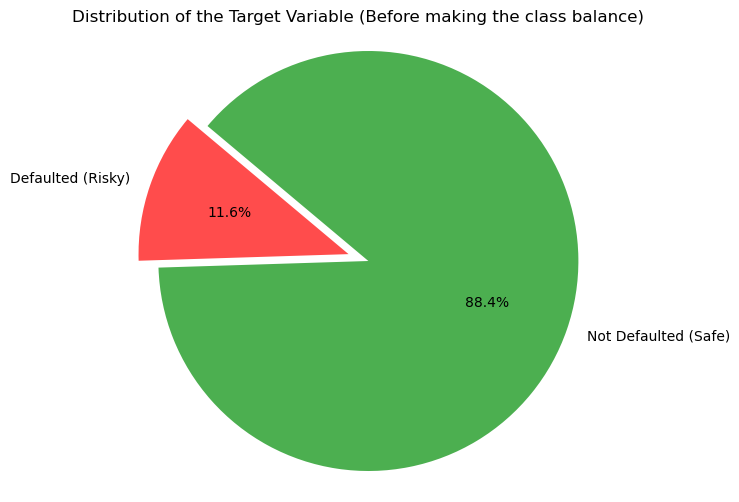

In [21]:
defaulted = loan_df[loan_df.default == 1].default.count()
not_defaulted = loan_df[loan_df.default == 0].default.count()

# Plot the Distribution of the Target Variable
counts = [defaulted, not_defaulted]
labels = ['Defaulted (Risky)', 'Not Defaulted (Safe)']
colors = ['#FF4C4C', '#4CAF50']

plt.figure(figsize=(6, 6))
plt.pie(counts, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140, explode=(0.1, 0))
plt.title('Distribution of the Target Variable (Before making the class balance)')
plt.axis('equal')
plt.show()

### Exploratory Data Analysis (EDA)

1. **Before addressing the Class Imbalance issue.**

**Univariate Analysis**: Looking at the distributions of individual features (histograms for numerical, bar plots for categorical).

In [25]:
loan_df.columns.tolist()

['age',
 'income',
 'loanamount',
 'creditscore',
 'monthsemployed',
 'numcreditlines',
 'interestrate',
 'loanterm',
 'dtiratio',
 'education',
 'employmenttype',
 'maritalstatus',
 'hasmortgage',
 'hasdependents',
 'loanpurpose',
 'hascosigner',
 'default']

<Figure size 2000x1500 with 0 Axes>

<Axes: >

<Axes: xlabel='age', ylabel='Count'>

Text(0.5, 1.0, 'Distribution of age')

<Axes: >

<Axes: xlabel='income', ylabel='Count'>

Text(0.5, 1.0, 'Distribution of income')

<Axes: >

<Axes: xlabel='loanamount', ylabel='Count'>

Text(0.5, 1.0, 'Distribution of loanamount')

<Axes: >

<Axes: xlabel='creditscore', ylabel='Count'>

Text(0.5, 1.0, 'Distribution of creditscore')

<Axes: >

<Axes: xlabel='monthsemployed', ylabel='Count'>

Text(0.5, 1.0, 'Distribution of monthsemployed')

<Axes: >

<Axes: xlabel='numcreditlines', ylabel='Count'>

Text(0.5, 1.0, 'Distribution of numcreditlines')

<Axes: >

<Axes: xlabel='interestrate', ylabel='Count'>

Text(0.5, 1.0, 'Distribution of interestrate')

<Axes: >

<Axes: xlabel='loanterm', ylabel='Count'>

Text(0.5, 1.0, 'Distribution of loanterm')

<Axes: >

<Axes: xlabel='dtiratio', ylabel='Count'>

Text(0.5, 1.0, 'Distribution of dtiratio')

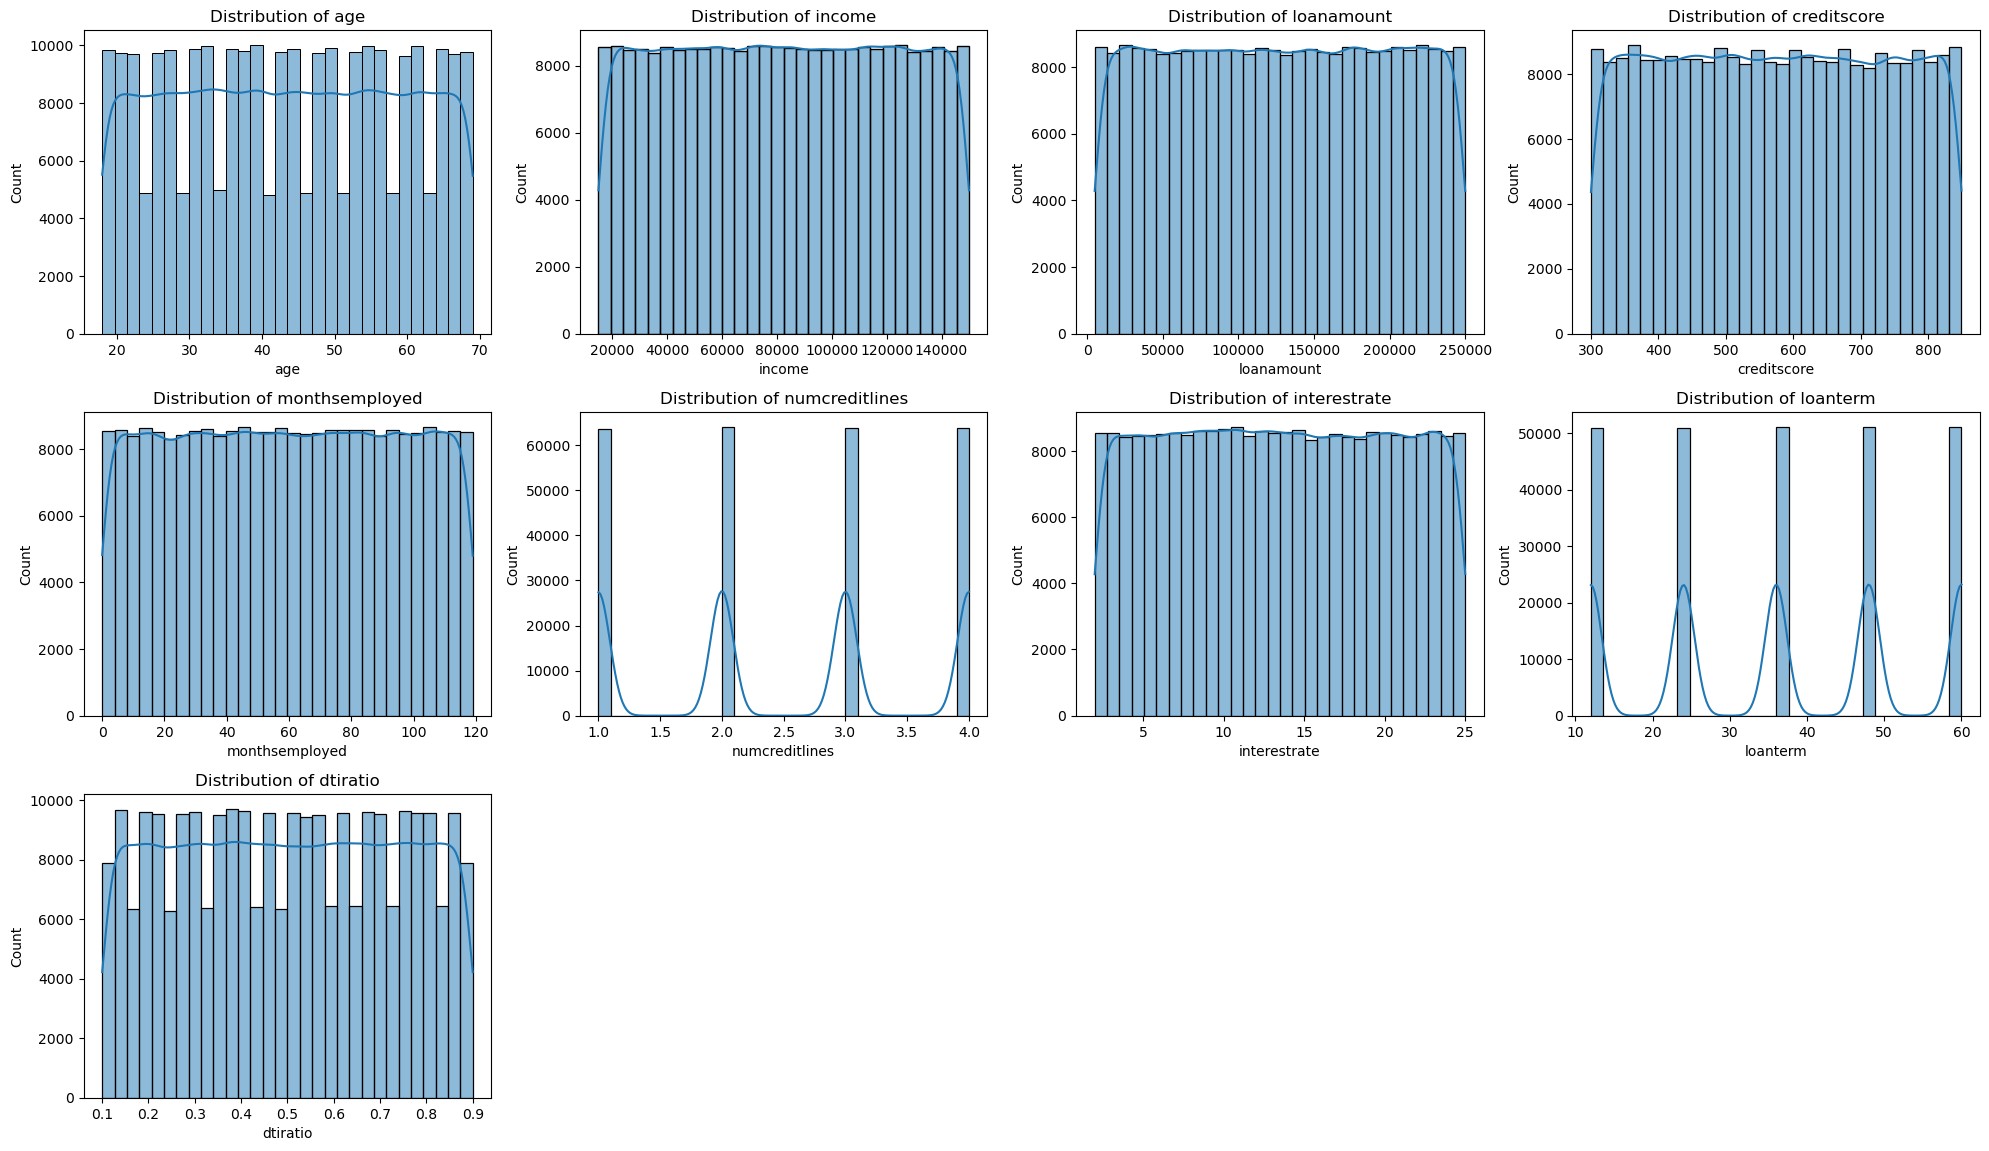

In [26]:
numeric_columns = ['age','income', 'loanamount', 'creditscore', 'monthsemployed',
                   'numcreditlines', 'interestrate', 'loanterm', 'dtiratio']

# Plot Histogram for Numeric Columns
plt.figure(figsize = (20, 15))
for i, n_col in enumerate(numeric_columns):
    plt.subplot(4, 4, i+1)
    sns.histplot(loan_df[n_col], kde = True, bins = 30)
    plt.title(f"Distribution of {n_col}")
    plt.tight_layout()
plt.show()

1. A striking commonality across almost all histograms (Age, Income, LoanAmount, CreditScore, MonthsEmployed, InterestRate, DTIRatio) is a highly uniform or nearly uniform distribution. This means that within their respective ranges, observations are almost equally distributed across all possible values.

2. The distributions of NumCreditLines and LoanTerm correctly reflect their discrete nature (counts and fixed terms), showing distinct peaks rather than continuous spreads.

<Figure size 2000x1500 with 0 Axes>

<Axes: >

<Axes: xlabel='education', ylabel='count'>

Text(0.5, 1.0, 'Distribution of education')

([0, 1, 2, 3],
 [Text(0, 0, "Bachelor's"),
  Text(1, 0, 'High School'),
  Text(2, 0, "Master's"),
  Text(3, 0, 'PhD')])

<Axes: >

<Axes: xlabel='employmenttype', ylabel='count'>

Text(0.5, 1.0, 'Distribution of employmenttype')

([0, 1, 2, 3],
 [Text(0, 0, 'Part-time'),
  Text(1, 0, 'Unemployed'),
  Text(2, 0, 'Self-employed'),
  Text(3, 0, 'Full-time')])

<Axes: >

<Axes: xlabel='maritalstatus', ylabel='count'>

Text(0.5, 1.0, 'Distribution of maritalstatus')

([0, 1, 2],
 [Text(0, 0, 'Married'), Text(1, 0, 'Divorced'), Text(2, 0, 'Single')])

<Axes: >

<Axes: xlabel='hasmortgage', ylabel='count'>

Text(0.5, 1.0, 'Distribution of hasmortgage')

([0, 1], [Text(0, 0, 'Yes'), Text(1, 0, 'No')])

<Axes: >

<Axes: xlabel='hasdependents', ylabel='count'>

Text(0.5, 1.0, 'Distribution of hasdependents')

([0, 1], [Text(0, 0, 'Yes'), Text(1, 0, 'No')])

<Axes: >

<Axes: xlabel='loanpurpose', ylabel='count'>

Text(0.5, 1.0, 'Distribution of loanpurpose')

([0, 1, 2, 3, 4],
 [Text(0, 0, 'Business'),
  Text(1, 0, 'Home'),
  Text(2, 0, 'Education'),
  Text(3, 0, 'Other'),
  Text(4, 0, 'Auto')])

<Axes: >

<Axes: xlabel='hascosigner', ylabel='count'>

Text(0.5, 1.0, 'Distribution of hascosigner')

([0, 1], [Text(0, 0, 'Yes'), Text(1, 0, 'No')])

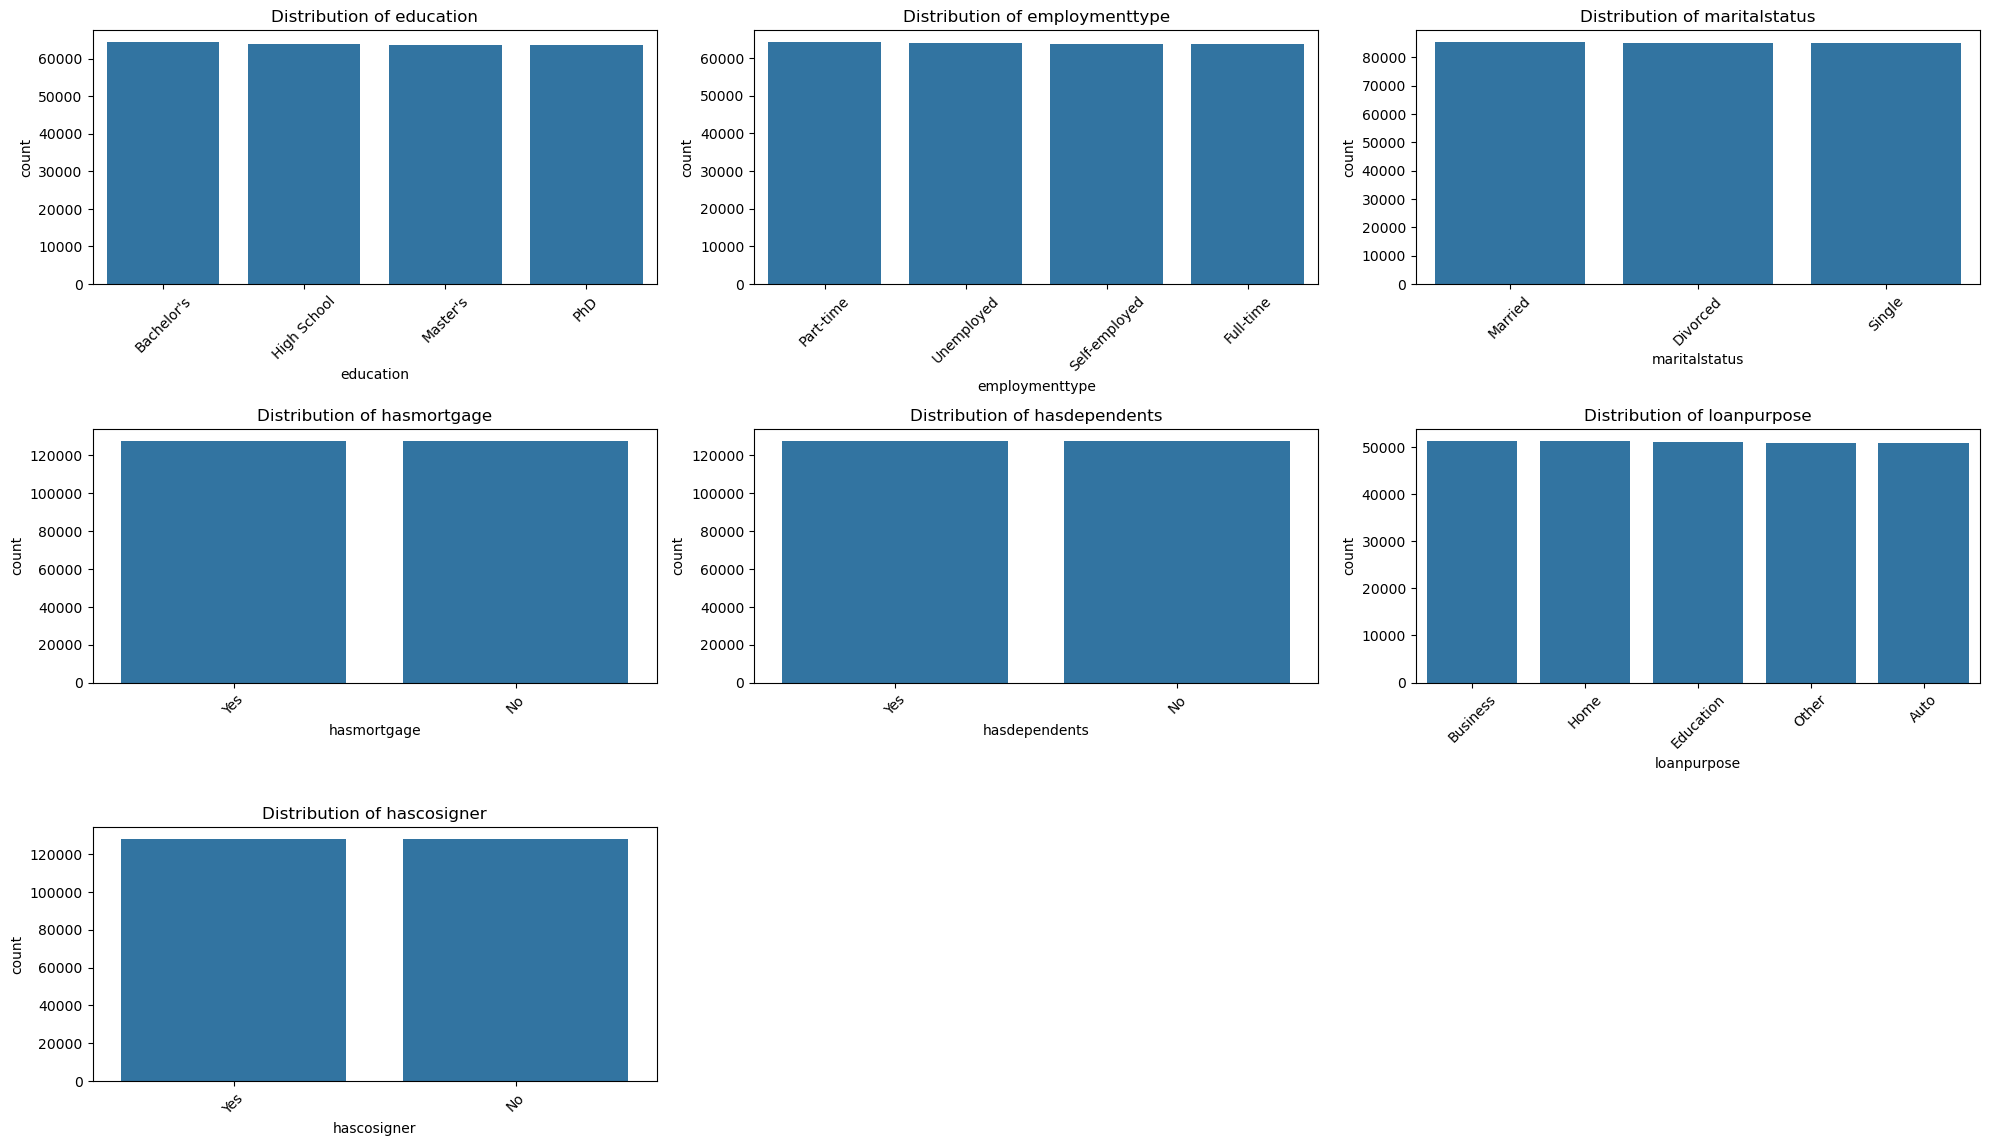

In [28]:
categorical_columns = ['education', 'employmenttype', 'maritalstatus', 'hasmortgage',
                       'hasdependents', 'loanpurpose', 'hascosigner']

# Plot Bar Chart for Categorical Columns
plt.figure(figsize = (20, 15))
for i, c_col in enumerate(categorical_columns):
    plt.subplot(4, 3, i+1)
    sns.countplot(data = loan_df, x = c_col, order = loan_df[c_col].value_counts().index)
    plt.title(f"Distribution of {c_col}")
    plt.xticks(rotation = 45)
    plt.tight_layout()
plt.show()

Similar to the numerical features, a dominant theme across most categorical features is a highly balanced or nearly uniform distribution across categories. This means that different categories within these features are almost equally represented in the dataset.

**Bivariate Distributions**: Helps to explore how do different features behave with respect to the target variable

<Figure size 2000x1500 with 0 Axes>

<Axes: >

<Axes: xlabel='default', ylabel='age'>

Text(0.5, 1.0, 'age vs Default')

<Axes: >

<Axes: xlabel='default', ylabel='income'>

Text(0.5, 1.0, 'income vs Default')

<Axes: >

<Axes: xlabel='default', ylabel='loanamount'>

Text(0.5, 1.0, 'loanamount vs Default')

<Axes: >

<Axes: xlabel='default', ylabel='creditscore'>

Text(0.5, 1.0, 'creditscore vs Default')

<Axes: >

<Axes: xlabel='default', ylabel='monthsemployed'>

Text(0.5, 1.0, 'monthsemployed vs Default')

<Axes: >

<Axes: xlabel='default', ylabel='numcreditlines'>

Text(0.5, 1.0, 'numcreditlines vs Default')

<Axes: >

<Axes: xlabel='default', ylabel='interestrate'>

Text(0.5, 1.0, 'interestrate vs Default')

<Axes: >

<Axes: xlabel='default', ylabel='loanterm'>

Text(0.5, 1.0, 'loanterm vs Default')

<Axes: >

<Axes: xlabel='default', ylabel='dtiratio'>

Text(0.5, 1.0, 'dtiratio vs Default')

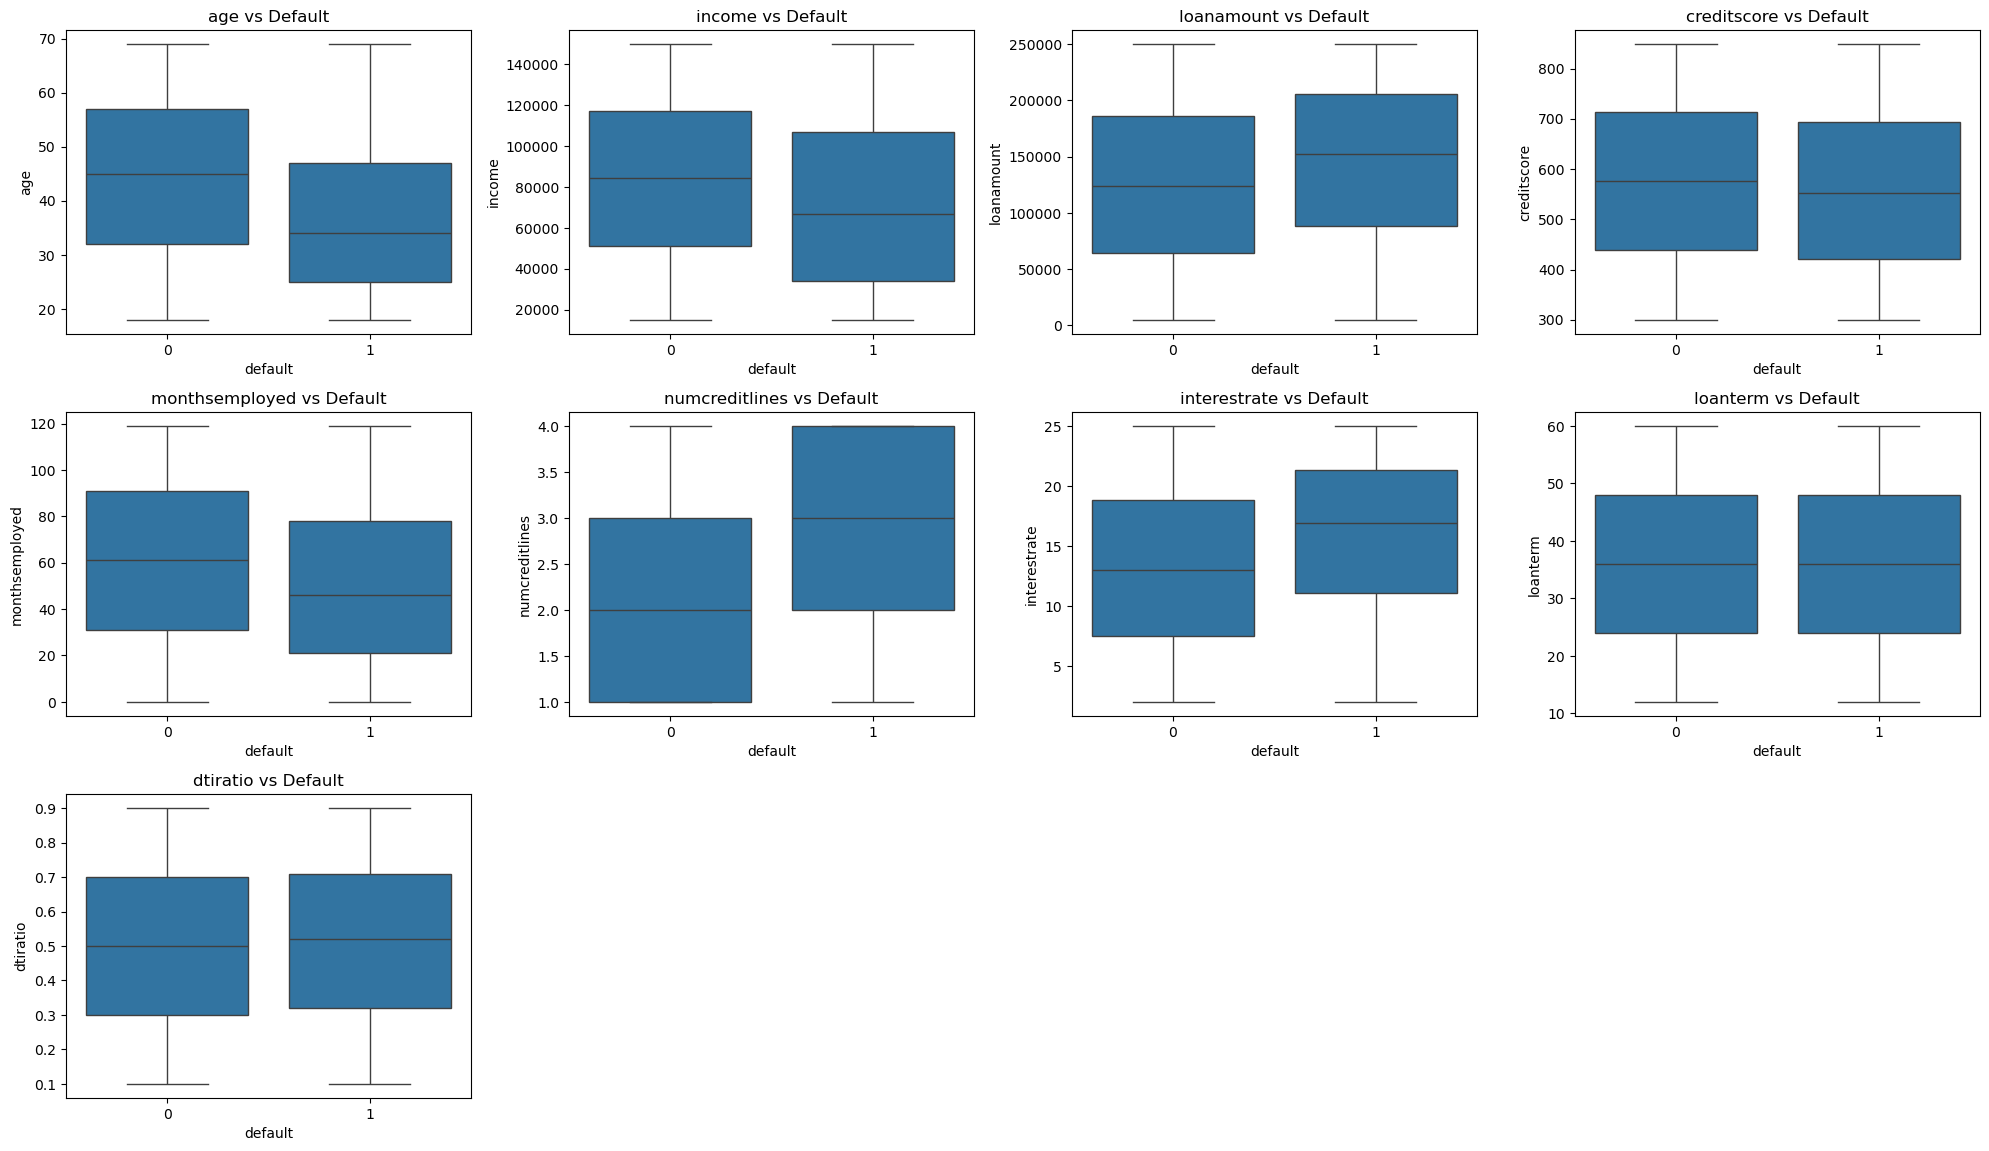

In [31]:
numeric_columns = ['age','income', 'loanamount', 'creditscore', 'monthsemployed',
                   'numcreditlines', 'interestrate', 'loanterm', 'dtiratio']

# Box Plot for Numeric Columns Vs. Target Variable
plt.figure(figsize=(20, 15))
for i, n_col in enumerate(numeric_columns):
    plt.subplot(4, 4, i+1)
    sns.boxplot(data = loan_df, x = 'default', y = n_col)
    plt.title(f'{n_col} vs Default')
    plt.tight_layout()
plt.show()

1. **Income**: Lower income is associated with a higher likelihood of default.

2. **CreditScore**: Lower credit scores are strongly associated with a higher likelihood of default.

3. **InterestRate**: Higher interest rates are strongly associated with a higher likelihood of default.

4. **LoanAmount**: Higher loan amounts show a slight association with higher default risk. The median loan amount for defaulting loans is somewhat higher.

5. **NumCreditLines**: A higher number of open credit lines appears to be associated with a higher likelihood of default.

6. **LoanTerm**: Longer loan terms seem to be associated with a higher likelihood of default.

7. **DTIRatio (Debt-to-Income Ratio)**: Higher DTI ratios show a slight association with higher default risk.

8. **Age**: Younger ages show a slight association with higher default risk.

9. **MonthsEmployed**: Fewer months employed (shorter job tenure) show an association with higher default risk.

<Figure size 2000x1500 with 0 Axes>

<Axes: >

<Axes: xlabel='education', ylabel='count'>

Text(0.5, 1.0, 'education vs Default')

([0, 1, 2, 3],
 [Text(0, 0, "Bachelor's"),
  Text(1, 0, 'High School'),
  Text(2, 0, "Master's"),
  Text(3, 0, 'PhD')])

<Axes: >

<Axes: xlabel='employmenttype', ylabel='count'>

Text(0.5, 1.0, 'employmenttype vs Default')

([0, 1, 2, 3],
 [Text(0, 0, 'Part-time'),
  Text(1, 0, 'Unemployed'),
  Text(2, 0, 'Self-employed'),
  Text(3, 0, 'Full-time')])

<Axes: >

<Axes: xlabel='maritalstatus', ylabel='count'>

Text(0.5, 1.0, 'maritalstatus vs Default')

([0, 1, 2],
 [Text(0, 0, 'Married'), Text(1, 0, 'Divorced'), Text(2, 0, 'Single')])

<Axes: >

<Axes: xlabel='hasmortgage', ylabel='count'>

Text(0.5, 1.0, 'hasmortgage vs Default')

([0, 1], [Text(0, 0, 'Yes'), Text(1, 0, 'No')])

<Axes: >

<Axes: xlabel='hasdependents', ylabel='count'>

Text(0.5, 1.0, 'hasdependents vs Default')

([0, 1], [Text(0, 0, 'Yes'), Text(1, 0, 'No')])

<Axes: >

<Axes: xlabel='loanpurpose', ylabel='count'>

Text(0.5, 1.0, 'loanpurpose vs Default')

([0, 1, 2, 3, 4],
 [Text(0, 0, 'Business'),
  Text(1, 0, 'Home'),
  Text(2, 0, 'Education'),
  Text(3, 0, 'Other'),
  Text(4, 0, 'Auto')])

<Axes: >

<Axes: xlabel='hascosigner', ylabel='count'>

Text(0.5, 1.0, 'hascosigner vs Default')

([0, 1], [Text(0, 0, 'Yes'), Text(1, 0, 'No')])

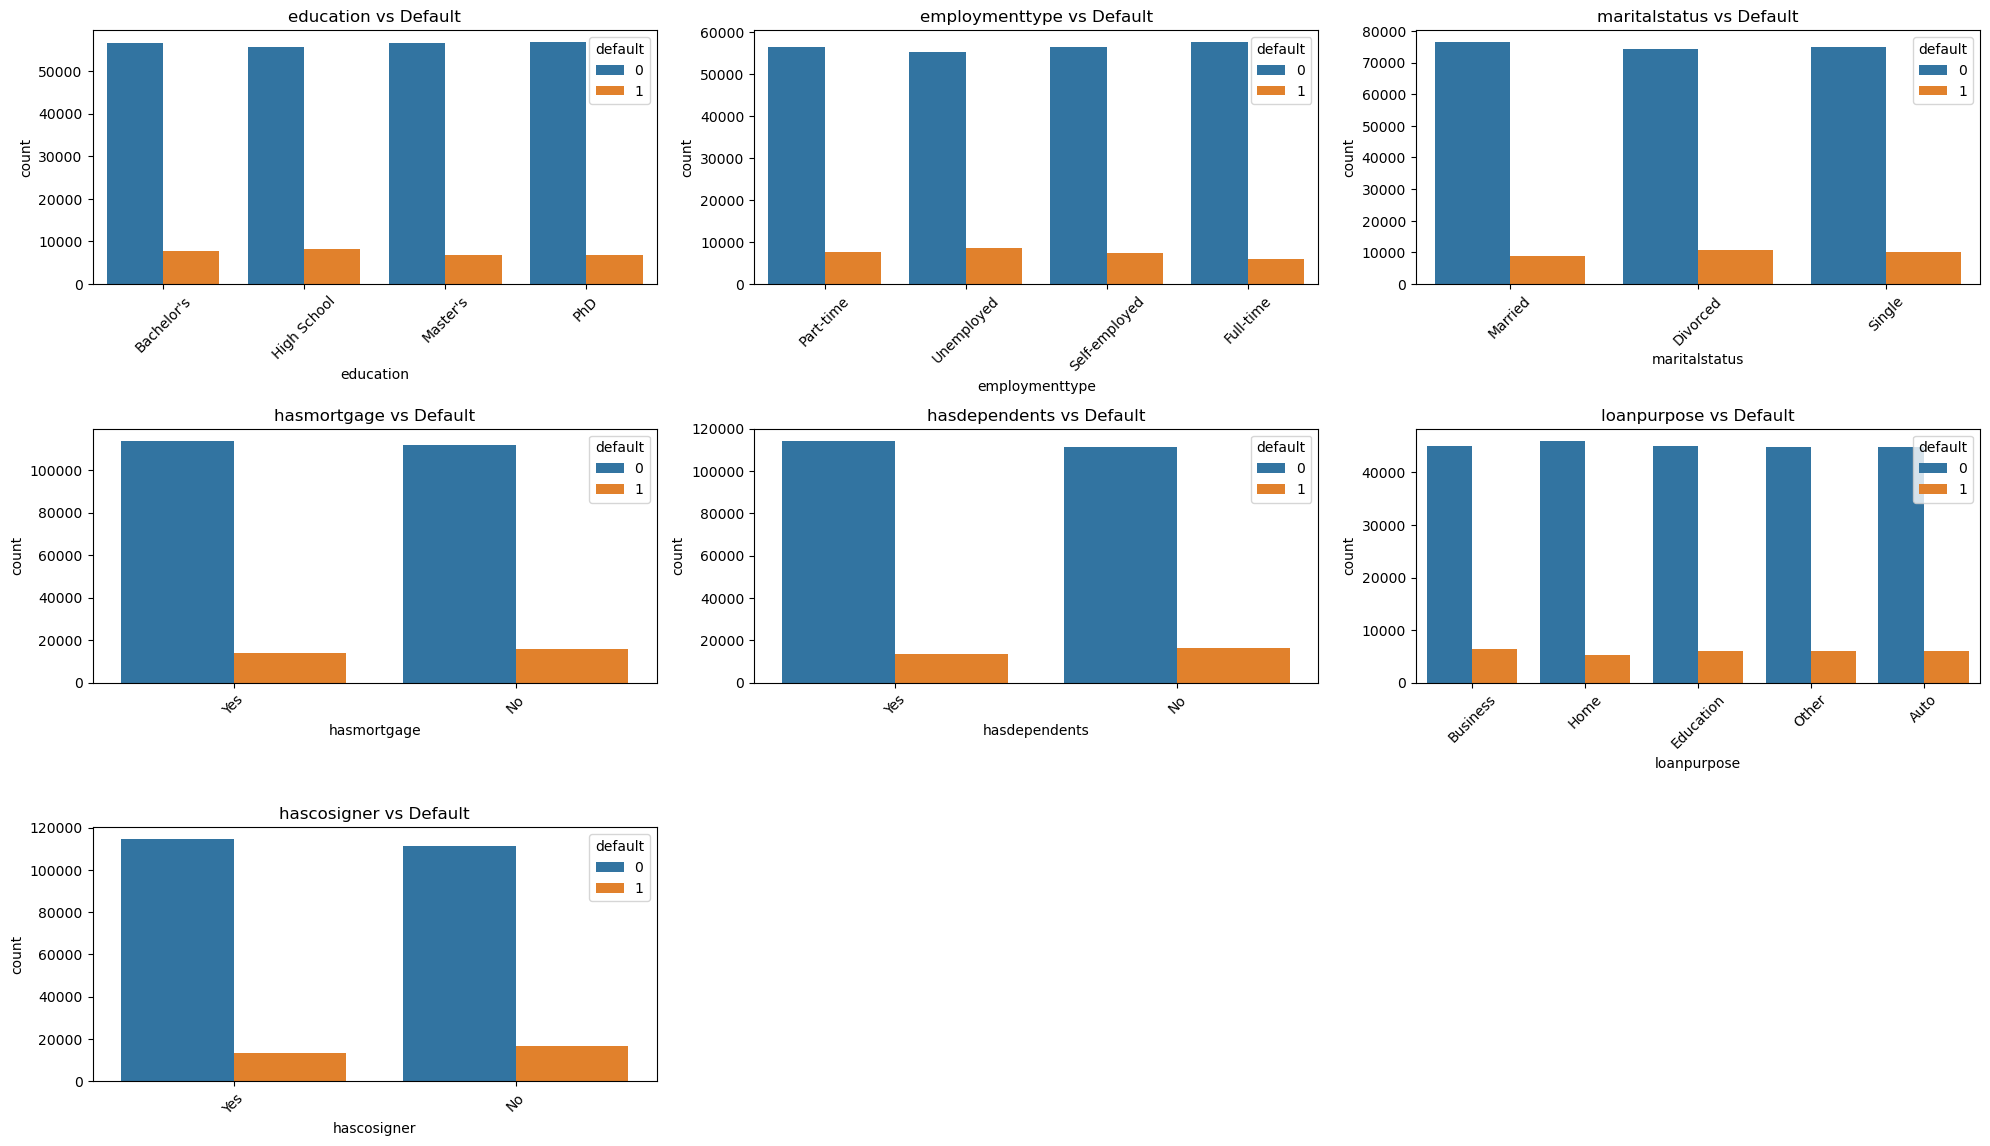

In [33]:
categorical_columns = ['education', 'employmenttype', 'maritalstatus', 'hasmortgage',
                       'hasdependents', 'loanpurpose', 'hascosigner']

# Categorical features vs Default
plt.figure(figsize=(20, 15))
for i, c_col in enumerate(categorical_columns):
    plt.subplot(4, 3, i+1)
    sns.countplot(data = loan_df, x = c_col, hue = 'default', order = loan_df[c_col].value_counts().index)
    plt.title(f'{c_col} vs Default')
    plt.xticks(rotation = 45)
    plt.tight_layout()
plt.show()

For almost all categorical features, there's a strong visual representation of class imbalance within each category. That is, within each specific education level, employment type, marital status, etc., the count of non-defaulting loans (blue bars, default=0) is significantly higher than the count of defaulting loans (orange bars, default=1). This confirms the overall class imbalance in the target variable.

None of the categorical features unlike numerical features show a strong differentiating relationship with the 'Default' target variable. For every category within each feature, the proportion of defaulting loans to non-defaulting loans remains remarkably consistent.

**Correlation Analysis**

<Figure size 1200x800 with 0 Axes>

<Axes: >

Text(0.5, 1.0, 'Correlation Analysis (Class Imbalance)')

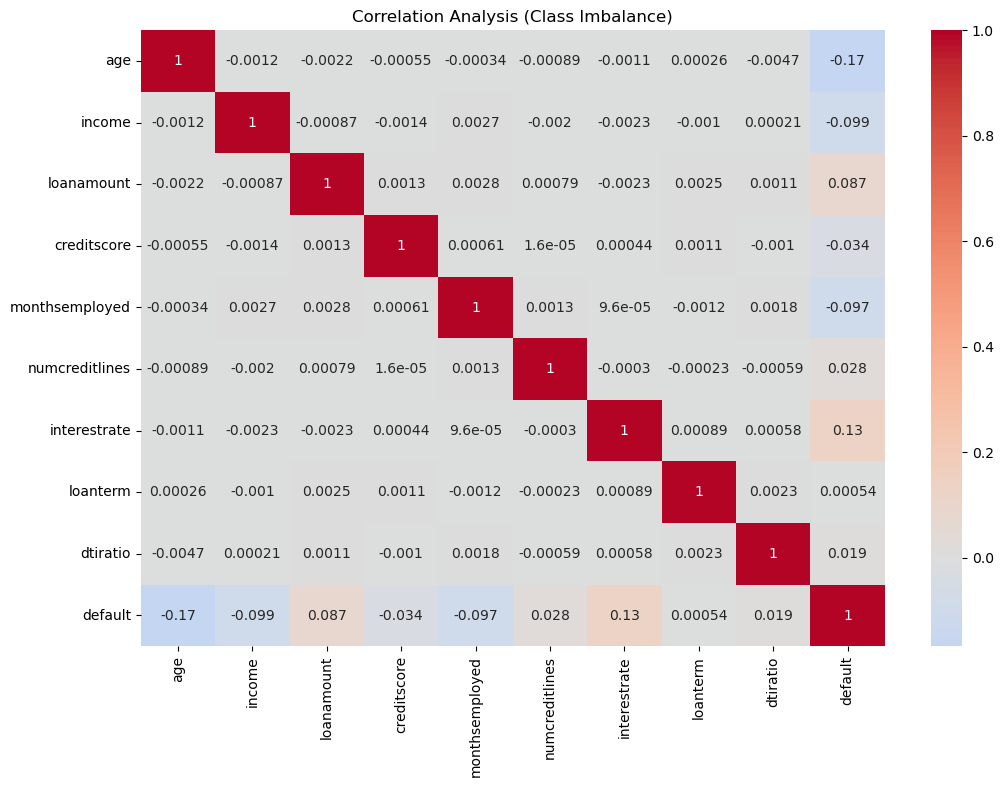

In [36]:
# Plot the Correlation Analysis Map
plt.figure(figsize=(12, 8))
sns.heatmap(loan_df.corr(numeric_only = True), annot=True, cmap='coolwarm', center=0)
plt.title("Correlation Analysis (Class Imbalance)")
plt.show()

**Correlations with default**

1. Negative Correlations:
<ul>
    <li>age: -0.17 (Moderate negative correlation)</li>
    <li>income: -0.099 (Weak negative correlation)</li>
    <li>creditscore: -0.034 (Very weak negative correlation)</li>
    <li>monthsemployed: -0.097 (Weak negative correlation)</li>
</ul>
<br>
2. Positive Correlations:

<ul>
    <li>loanamount: 0.087 (Weak positive correlation)</li>
    <li>numcreditlines: 0.028 (Very weak positive correlation)</li>
    <li>interestrate: 0.13 (Weak to moderate positive correlation)</li>
    <li>loanterm: 0.0054 (Extremely weak positive correlation)</li>
    <li>dtiratio: 0.019 (Very weak positive correlation)</li>
</ul>

**Interpretation**

In the imbalanced dataset, the correlations of features with default are generally weak to very weak.

This is a common phenomenon in highly imbalanced datasets. The overwhelming majority class (default=0) can mask or suppress the true strength of relationships between features and the minority class (default=1). The correlation coefficient, being a measure of linear relationship, gets heavily influenced by the dominant class. It suggests that linear relationships are not very strong in the imbalanced data.

#### **Class Imbalance to Class Balance**

Our data is disproportionally full of safe loans. Let's create two datasets: one with just the safe loans (not_defaulted_raw) and one with just the risky loans (defaulted_raw).

In [40]:
#Dataset 1 (Not Defaulted loans)
not_defaulted_raw = loan_df[loan_df.default == 0]

#Dataset 2 (Defaulted loans)
defaulted_raw = loan_df[loan_df.default == 1]

# Glimpse of both the data set
not_defaulted_raw.head()
defaulted_raw.head()

,age,income,loanamount,creditscore,monthsemployed,numcreditlines,interestrate,loanterm,dtiratio,education,employmenttype,maritalstatus,hasmortgage,hasdependents,loanpurpose,hascosigner,default
loanid,,,,,,,,,,,,,,,,,
I38PQUQS96,56,85994,50587,520,80,4,15.23,36,0.44,Bachelor's,Full-time,Divorced,Yes,Yes,Other,Yes,0
HPSK72WA7R,69,50432,124440,458,15,1,4.81,60,0.68,Master's,Full-time,Married,No,No,Other,Yes,0
V2KKSFM3UN,32,31713,44799,743,0,3,7.07,24,0.23,High School,Full-time,Married,No,No,Business,No,0
EY08JDHTZP,60,20437,9139,633,8,4,6.51,48,0.73,Bachelor's,Unemployed,Divorced,No,Yes,Auto,No,0
H8GXPAOS71,38,111188,177025,429,80,1,19.11,12,0.16,Bachelor's,Unemployed,Single,Yes,No,Home,Yes,0


,age,income,loanamount,creditscore,monthsemployed,numcreditlines,interestrate,loanterm,dtiratio,education,employmenttype,maritalstatus,hasmortgage,hasdependents,loanpurpose,hascosigner,default
loanid,,,,,,,,,,,,,,,,,
C1OZ6DPJ8Y,46,84208,129188,451,26,3,21.17,24,0.31,Master's,Unemployed,Divorced,Yes,Yes,Auto,No,1
A9S62RQ7US,25,90298,90448,720,18,2,22.72,24,0.10,High School,Unemployed,Single,Yes,No,Business,Yes,1
1R0N3LGNRJ,36,42053,92357,827,83,1,23.94,48,0.20,Bachelor's,Self-employed,Divorced,Yes,No,Education,No,1
Y8UETC3LSG,28,149227,139759,375,56,3,5.84,36,0.80,PhD,Full-time,Divorced,No,No,Education,Yes,1
O1IKKLC69B,19,40718,78515,319,119,2,14.00,24,0.17,Bachelor's,Self-employed,Divorced,Yes,No,Education,No,1


One way to combat class imbalance is to undersample the larger class until the class distribution is approximately half and half. Here, we will undersample the larger class (not defaulted loans) in order to balance out our dataset. This means we are throwing away many data points. We will use seed=1 so everyone gets the same results. 

In [42]:
# Since there are fewer risky loans than safe loans, find the ratio of the sizes and use that percentage to undersample the safe loans.

percentage = len(defaulted_raw)/float(len(not_defaulted_raw))
defaulted_loans = defaulted_raw
not_defaulted_loans = not_defaulted_raw.sample(frac = percentage, random_state = 1)

# Append the risky_loans with the downsampled version of safe_loans
balanced_data = pd.concat([defaulted_loans, not_defaulted_loans])

In [43]:
# Glimpse of Balanced Class
balanced_data.head()

# Proportion of Class
# Default -  Yes
new_default_yes = (balanced_data.default.sum() / balanced_data.default.count()) * 100

# Default - No
new_default_no = ((balanced_data.default.count() - balanced_data.default.sum()) / balanced_data.default.count()) * 100

print("After balancing the class, {:.2f}% of the borrowers have defaulted (classified as risky), while the remaining {:.2f}% have not defaulted (classified as safe)."
      .format(new_default_yes, new_default_no))

,age,income,loanamount,creditscore,monthsemployed,numcreditlines,interestrate,loanterm,dtiratio,education,employmenttype,maritalstatus,hasmortgage,hasdependents,loanpurpose,hascosigner,default
loanid,,,,,,,,,,,,,,,,,
C1OZ6DPJ8Y,46,84208,129188,451,26,3,21.17,24,0.31,Master's,Unemployed,Divorced,Yes,Yes,Auto,No,1
A9S62RQ7US,25,90298,90448,720,18,2,22.72,24,0.10,High School,Unemployed,Single,Yes,No,Business,Yes,1
1R0N3LGNRJ,36,42053,92357,827,83,1,23.94,48,0.20,Bachelor's,Self-employed,Divorced,Yes,No,Education,No,1
Y8UETC3LSG,28,149227,139759,375,56,3,5.84,36,0.80,PhD,Full-time,Divorced,No,No,Education,Yes,1
O1IKKLC69B,19,40718,78515,319,119,2,14.00,24,0.17,Bachelor's,Self-employed,Divorced,Yes,No,Education,No,1


After balancing the class, 50.00% of the borrowers have defaulted (classified as risky), while the remaining 50.00% have not defaulted (classified as safe).


In [44]:
print("Shape of the Balanced Data: {}".format(balanced_data.shape))

Shape of the Balanced Data: (59306, 17)


<Figure size 600x600 with 0 Axes>

([<matplotlib.patches.Wedge at 0x14d92aff0>,
 [Text(-1.2000000000000002, 1.469576158976824e-16, 'Defaulted (Risky)'),
  Text(1.1, -2.6942229581241775e-16, 'Not Defaulted (Safe)')],
 [Text(-0.7, 8.572527594031472e-17, '50.0%'),
  Text(0.6, -1.4695761589768238e-16, '50.0%')])

Text(0.5, 1.0, 'Distribution of the Target Variable (After making the class balance)')

(-1.205, 1.105, -1.1, 1.1)

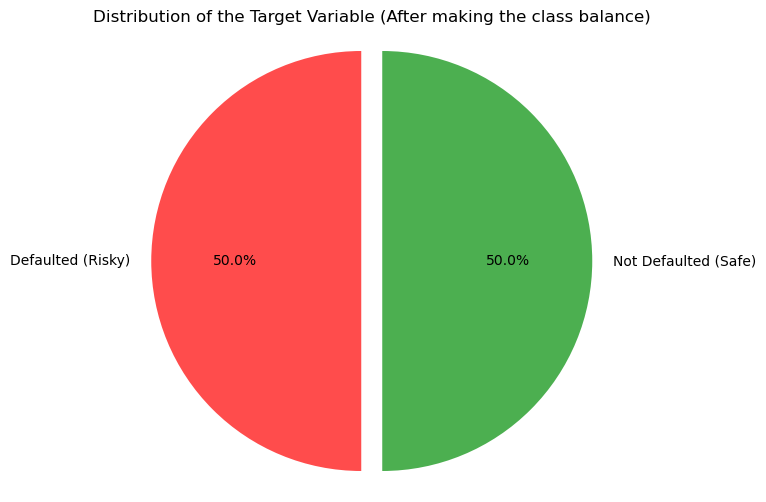

In [45]:
new_defaulted = balanced_data[balanced_data.default == 1].default.count()
new_not_defaulted = balanced_data[balanced_data.default == 0].default.count()

# Plot the Distribution of the Target Variable
counts = [new_defaulted, new_not_defaulted]
labels = ['Defaulted (Risky)', 'Not Defaulted (Safe)']
colors = ['#FF4C4C', '#4CAF50']

plt.figure(figsize=(6, 6))
plt.pie(counts, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90, explode=(0.1, 0))
plt.title('Distribution of the Target Variable (After making the class balance)')
plt.axis('equal')
plt.show()

2. **After addressing the Class Imbalance issue.**

**Univariate Analysis**

<Figure size 2000x1500 with 0 Axes>

<Axes: >

<Axes: xlabel='age', ylabel='Count'>

Text(0.5, 1.0, 'Distribution of age')

<Axes: >

<Axes: xlabel='income', ylabel='Count'>

Text(0.5, 1.0, 'Distribution of income')

<Axes: >

<Axes: xlabel='loanamount', ylabel='Count'>

Text(0.5, 1.0, 'Distribution of loanamount')

<Axes: >

<Axes: xlabel='creditscore', ylabel='Count'>

Text(0.5, 1.0, 'Distribution of creditscore')

<Axes: >

<Axes: xlabel='monthsemployed', ylabel='Count'>

Text(0.5, 1.0, 'Distribution of monthsemployed')

<Axes: >

<Axes: xlabel='numcreditlines', ylabel='Count'>

Text(0.5, 1.0, 'Distribution of numcreditlines')

<Axes: >

<Axes: xlabel='interestrate', ylabel='Count'>

Text(0.5, 1.0, 'Distribution of interestrate')

<Axes: >

<Axes: xlabel='loanterm', ylabel='Count'>

Text(0.5, 1.0, 'Distribution of loanterm')

<Axes: >

<Axes: xlabel='dtiratio', ylabel='Count'>

Text(0.5, 1.0, 'Distribution of dtiratio')

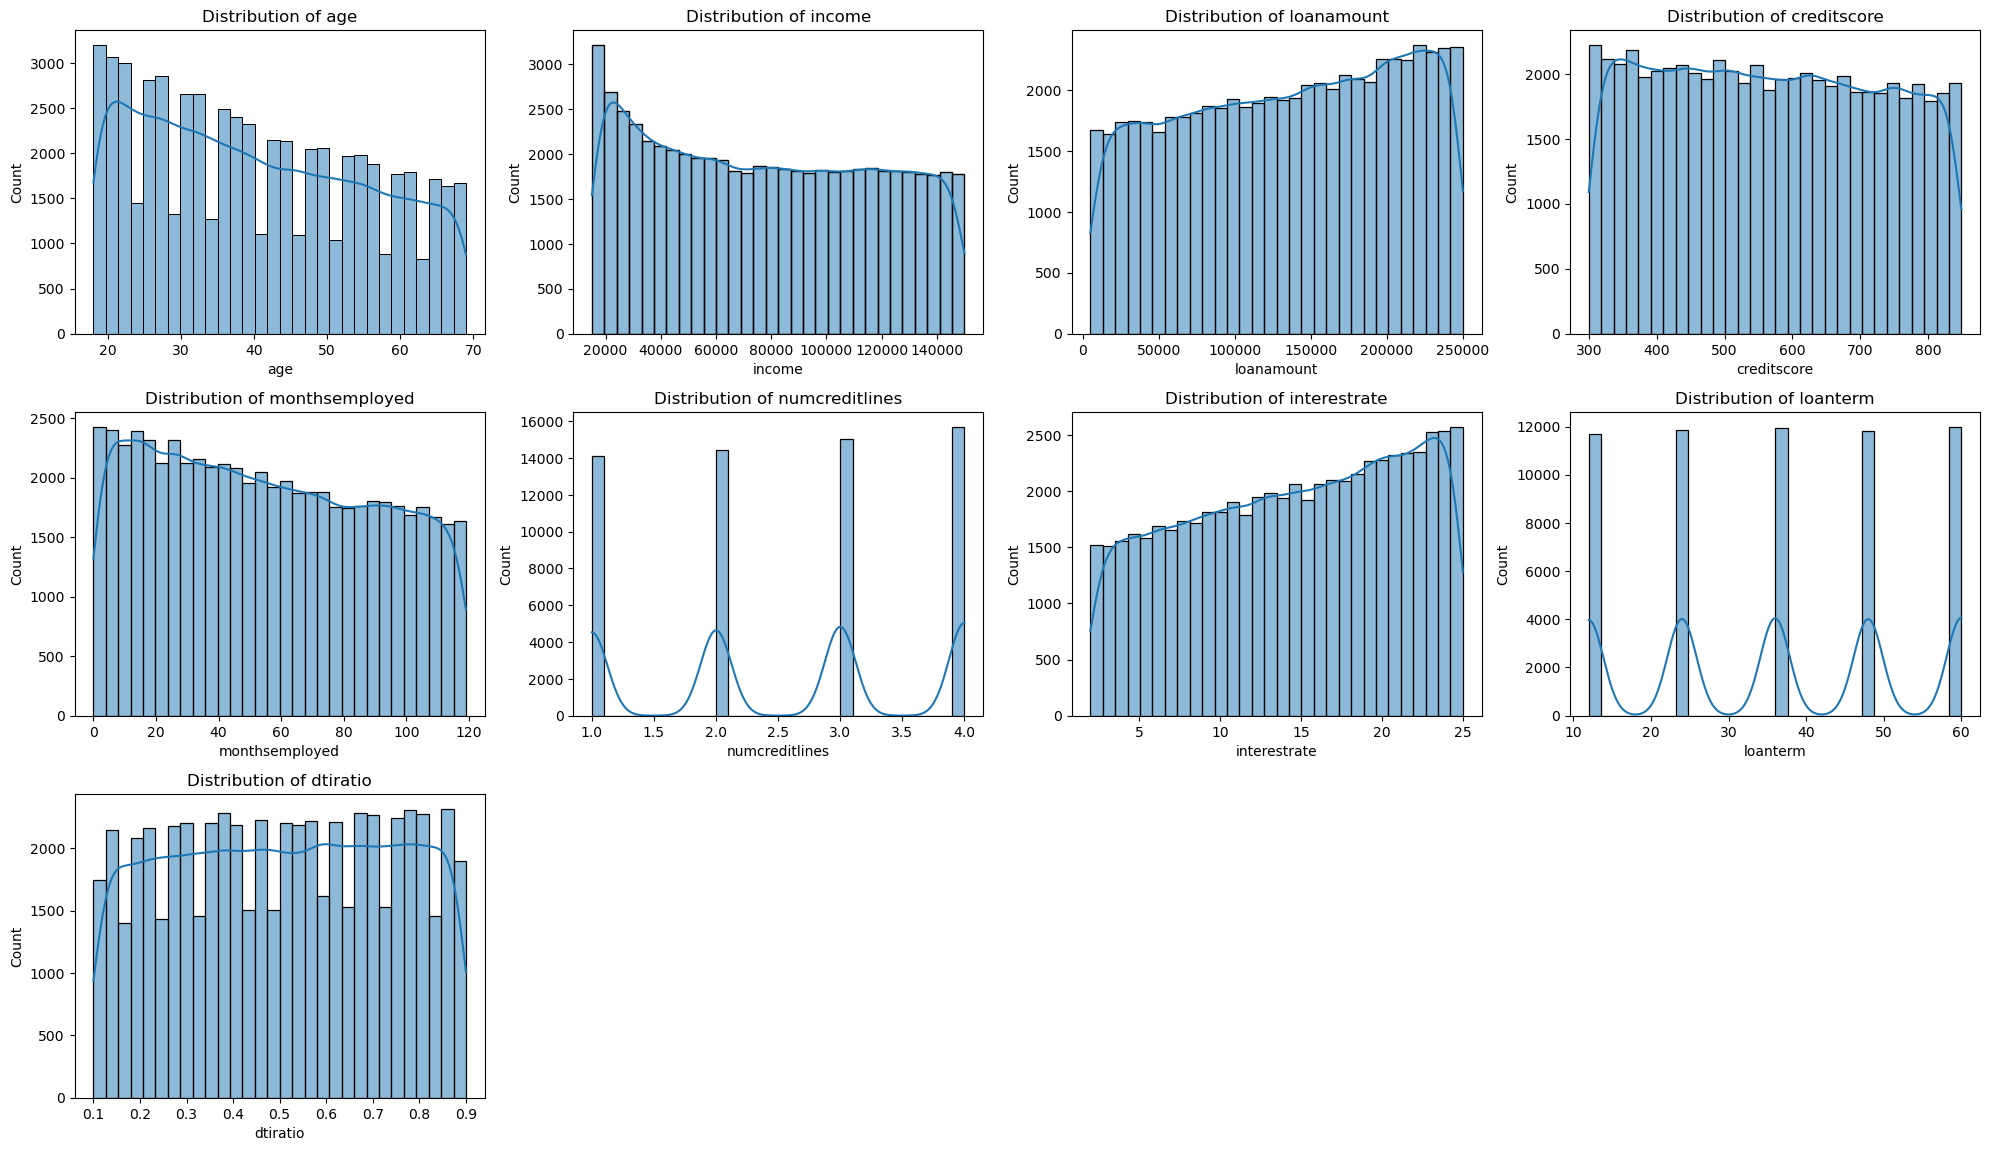

In [48]:
numeric_columns = ['age','income', 'loanamount', 'creditscore', 'monthsemployed',
                   'numcreditlines', 'interestrate', 'loanterm', 'dtiratio']

# Plot Histogram for Numeric Columns
plt.figure(figsize = (20, 15))
for i, n_col in enumerate(numeric_columns):
    plt.subplot(4, 4, i+1)
    sns.histplot(balanced_data[n_col], kde = True, bins = 30)
    plt.title(f"Distribution of {n_col}")
    plt.tight_layout()
plt.show()

Compared to the initial uniform distributions, several numerical features now show non-uniform, often skewed or more natural-looking distributions. This change is a direct result of the balancing process, which has altered the overall distribution of the features to reflect the newly balanced target variable.

This should help the model learn the patterns of default more effectively, as it's no longer overwhelmed by the majority "non-default" class.

<Figure size 2000x1500 with 0 Axes>

<Axes: >

<Axes: xlabel='education', ylabel='count'>

Text(0.5, 1.0, 'Distribution of education')

([0, 1, 2, 3],
 [Text(0, 0, 'High School'),
  Text(1, 0, "Bachelor's"),
  Text(2, 0, 'PhD'),
  Text(3, 0, "Master's")])

<Axes: >

<Axes: xlabel='employmenttype', ylabel='count'>

Text(0.5, 1.0, 'Distribution of employmenttype')

([0, 1, 2, 3],
 [Text(0, 0, 'Unemployed'),
  Text(1, 0, 'Part-time'),
  Text(2, 0, 'Self-employed'),
  Text(3, 0, 'Full-time')])

<Axes: >

<Axes: xlabel='maritalstatus', ylabel='count'>

Text(0.5, 1.0, 'Distribution of maritalstatus')

([0, 1, 2],
 [Text(0, 0, 'Divorced'), Text(1, 0, 'Single'), Text(2, 0, 'Married')])

<Axes: >

<Axes: xlabel='hasmortgage', ylabel='count'>

Text(0.5, 1.0, 'Distribution of hasmortgage')

([0, 1], [Text(0, 0, 'No'), Text(1, 0, 'Yes')])

<Axes: >

<Axes: xlabel='hasdependents', ylabel='count'>

Text(0.5, 1.0, 'Distribution of hasdependents')

([0, 1], [Text(0, 0, 'No'), Text(1, 0, 'Yes')])

<Axes: >

<Axes: xlabel='loanpurpose', ylabel='count'>

Text(0.5, 1.0, 'Distribution of loanpurpose')

([0, 1, 2, 3, 4],
 [Text(0, 0, 'Business'),
  Text(1, 0, 'Auto'),
  Text(2, 0, 'Education'),
  Text(3, 0, 'Other'),
  Text(4, 0, 'Home')])

<Axes: >

<Axes: xlabel='hascosigner', ylabel='count'>

Text(0.5, 1.0, 'Distribution of hascosigner')

([0, 1], [Text(0, 0, 'No'), Text(1, 0, 'Yes')])

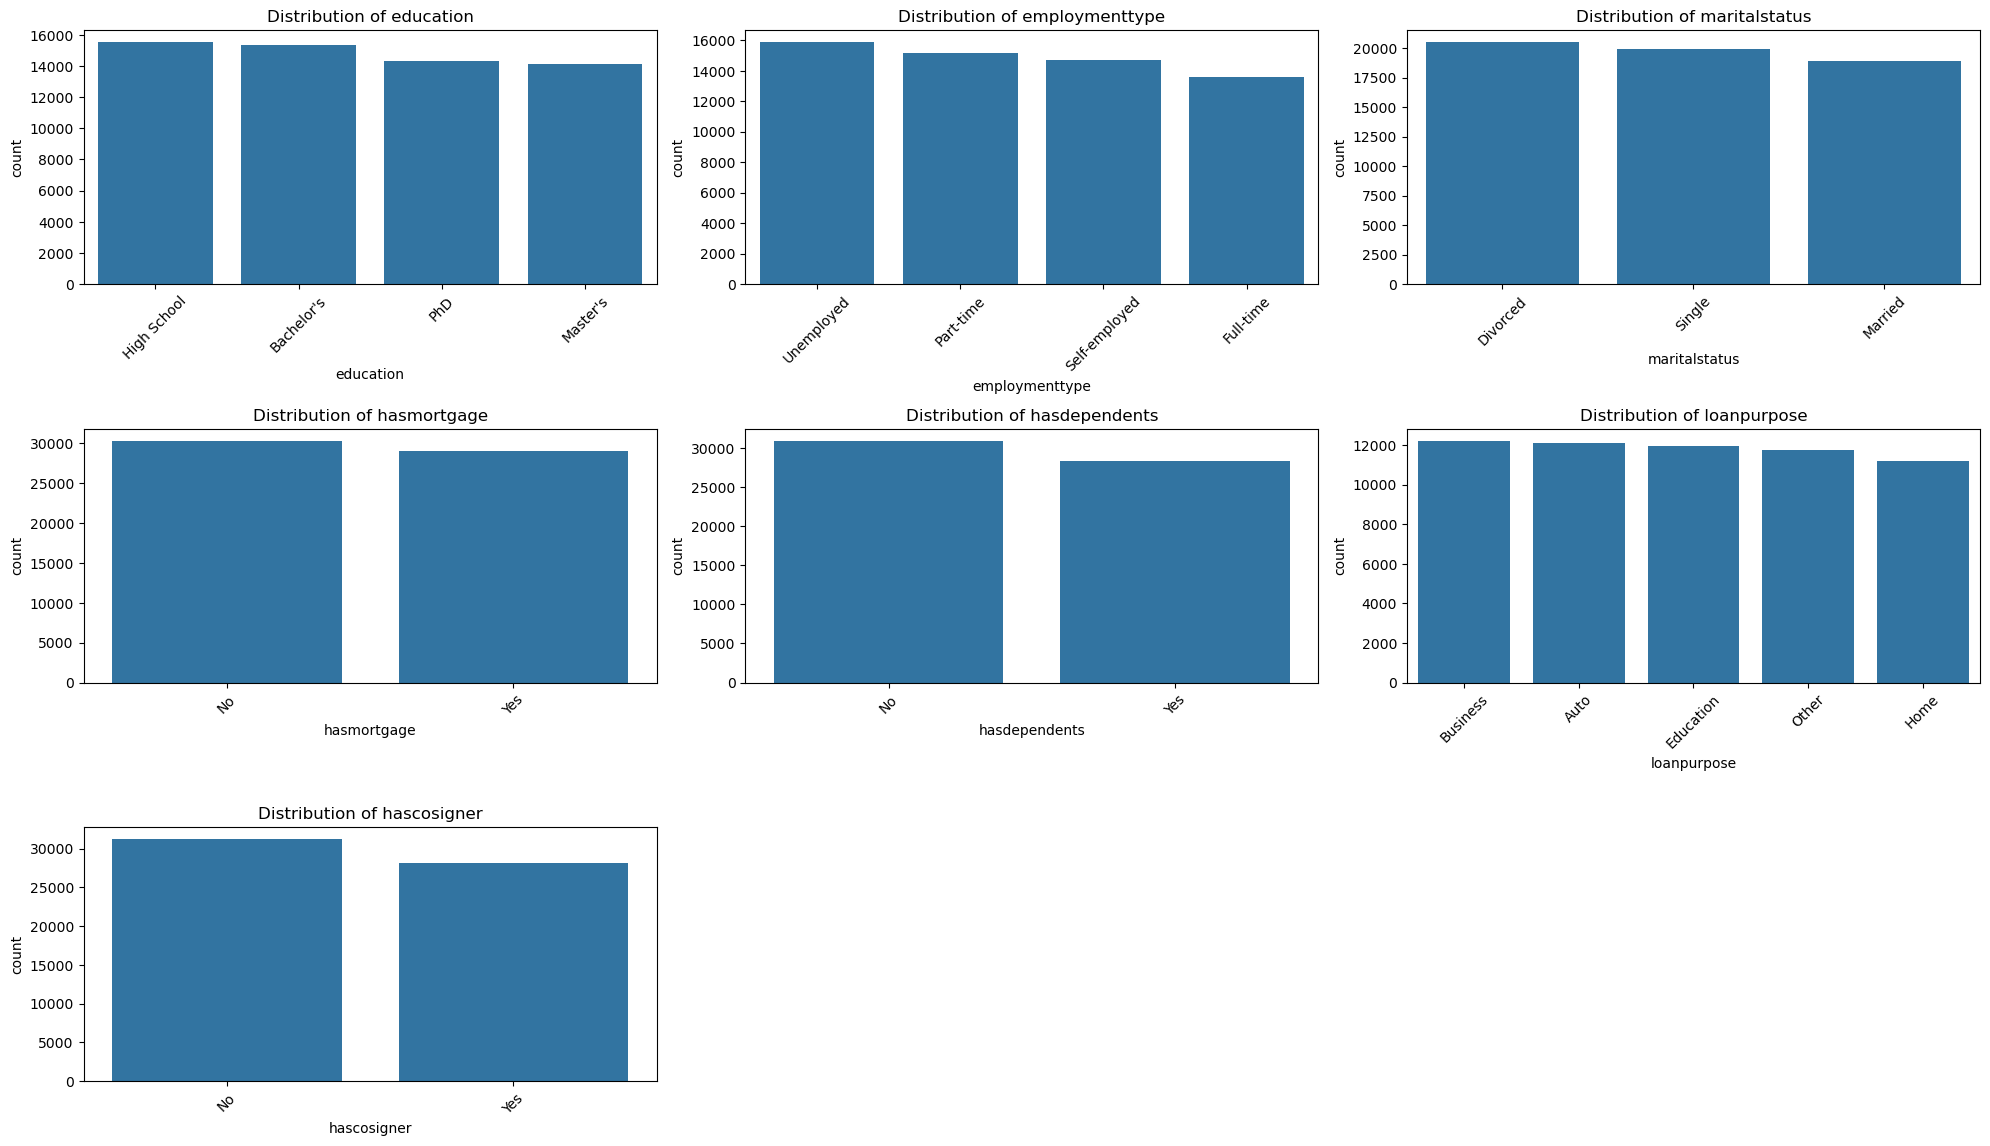

In [50]:
categorical_columns = ['education', 'employmenttype', 'maritalstatus', 'hasmortgage',
                       'hasdependents', 'loanpurpose', 'hascosigner']

# Plot Bar Chart for Categorical Columns
plt.figure(figsize = (20, 15))
for i, c_col in enumerate(categorical_columns):
    plt.subplot(4, 3, i+1)
    sns.countplot(data = balanced_data, x = c_col, order = balanced_data[c_col].value_counts().index)
    plt.title(f"Distribution of {c_col}")
    plt.xticks(rotation = 45)
    plt.tight_layout()
plt.show()

After balancing, the dataset now has an equal number of defaulting and non-defaulting loans, achieved by undersampling the majority (non-default) class. While the absolute counts for all categorical features have decreased proportionally, their internal distributions remain remarkably uniform across categories.

**Bivariate Distributions**

<Figure size 2000x1500 with 0 Axes>

<Axes: >

<Axes: xlabel='default', ylabel='age'>

Text(0.5, 1.0, 'age vs Default')

<Axes: >

<Axes: xlabel='default', ylabel='income'>

Text(0.5, 1.0, 'income vs Default')

<Axes: >

<Axes: xlabel='default', ylabel='loanamount'>

Text(0.5, 1.0, 'loanamount vs Default')

<Axes: >

<Axes: xlabel='default', ylabel='creditscore'>

Text(0.5, 1.0, 'creditscore vs Default')

<Axes: >

<Axes: xlabel='default', ylabel='monthsemployed'>

Text(0.5, 1.0, 'monthsemployed vs Default')

<Axes: >

<Axes: xlabel='default', ylabel='numcreditlines'>

Text(0.5, 1.0, 'numcreditlines vs Default')

<Axes: >

<Axes: xlabel='default', ylabel='interestrate'>

Text(0.5, 1.0, 'interestrate vs Default')

<Axes: >

<Axes: xlabel='default', ylabel='loanterm'>

Text(0.5, 1.0, 'loanterm vs Default')

<Axes: >

<Axes: xlabel='default', ylabel='dtiratio'>

Text(0.5, 1.0, 'dtiratio vs Default')

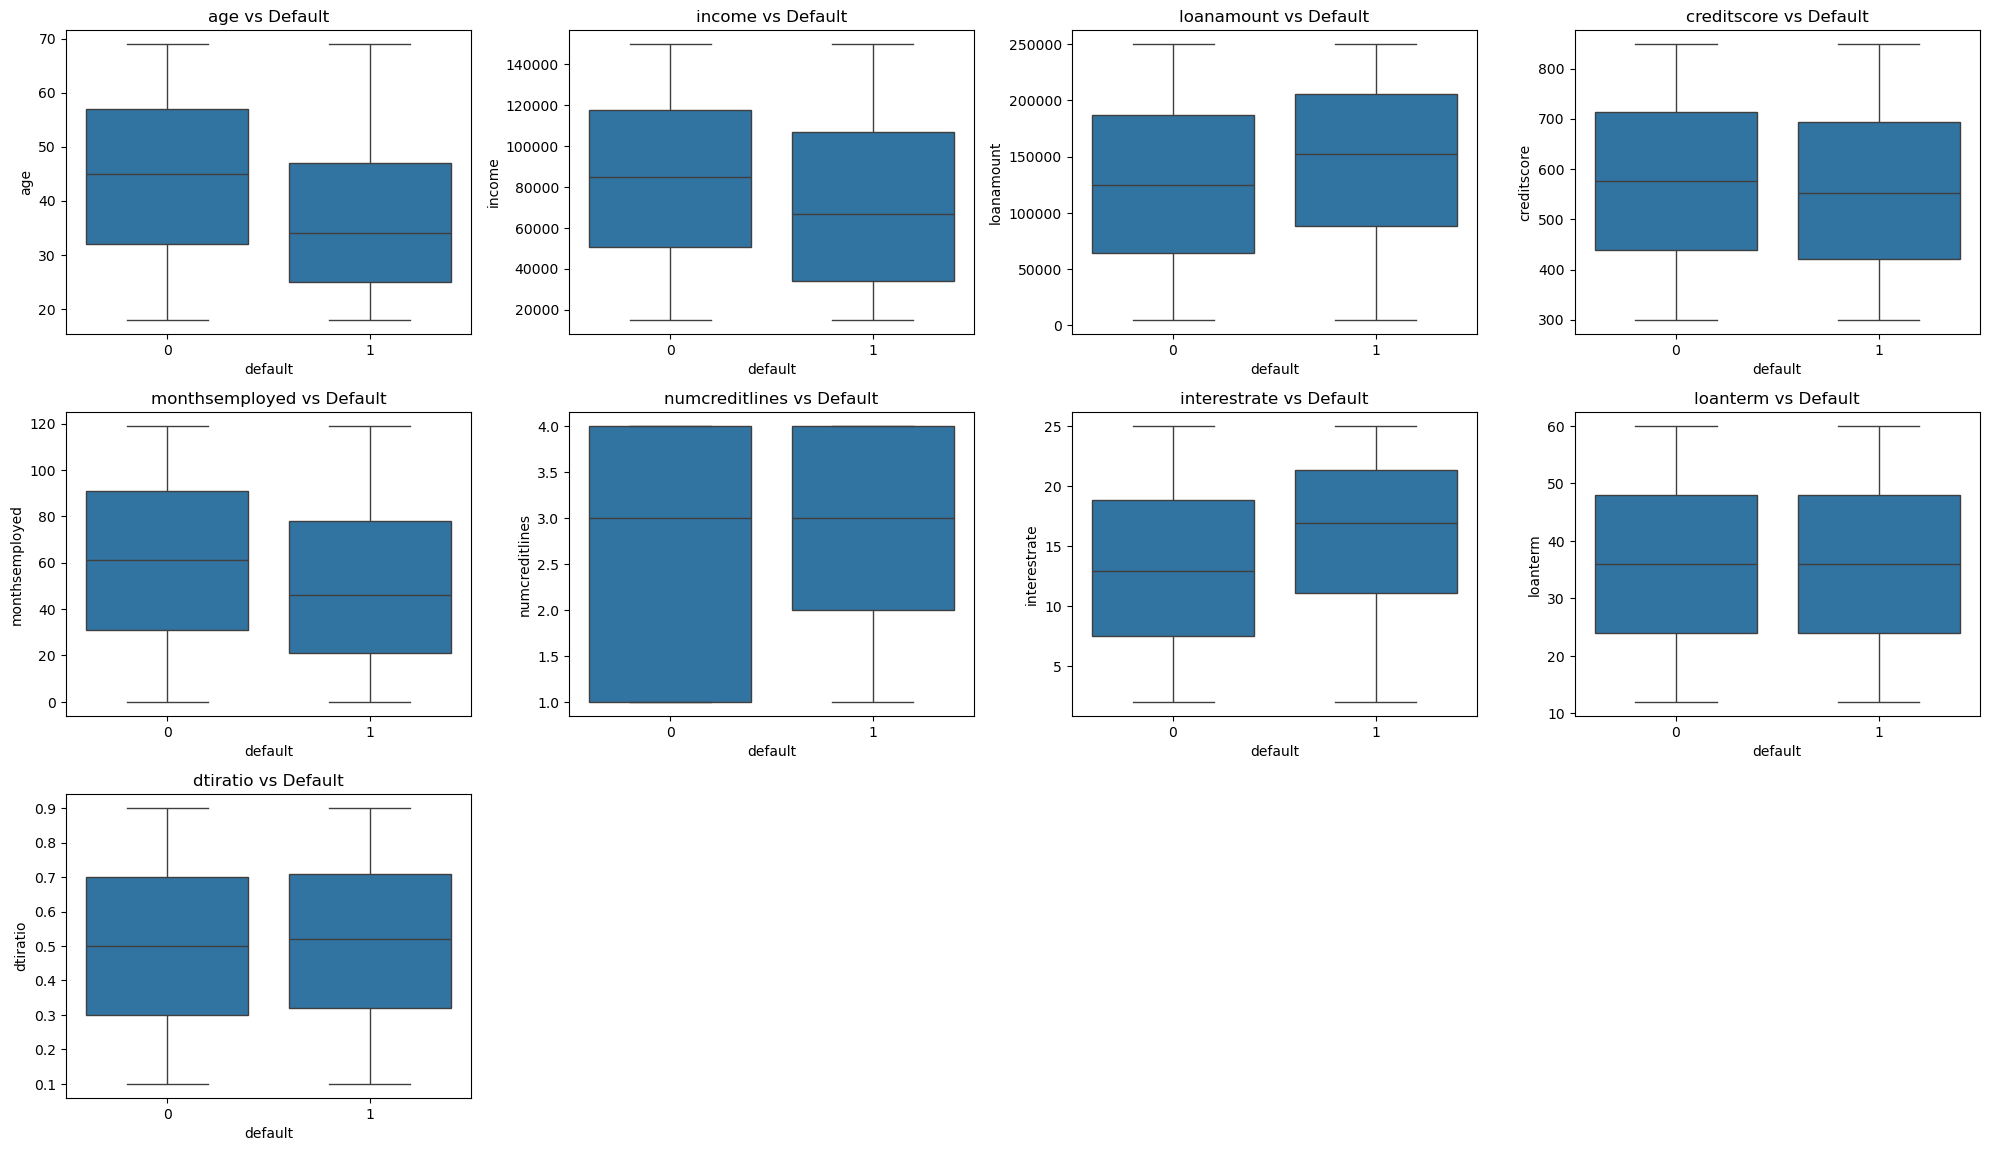

In [53]:
numeric_columns = ['age','income', 'loanamount', 'creditscore', 'monthsemployed',
                   'numcreditlines', 'interestrate', 'loanterm', 'dtiratio']

# Box Plot for Numeric Columns Vs. Target Variable
plt.figure(figsize=(20, 15))
for i, n_col in enumerate(numeric_columns):
    plt.subplot(4, 4, i+1)
    sns.boxplot(data = balanced_data, x = 'default', y = n_col)
    plt.title(f'{n_col} vs Default')
    plt.tight_layout()
plt.show()

These box plots reveal that most numerical features exhibit a clear differentiation between defaulting and non-defaulting loans. Borrowers who default tend to have lower Income, lower Credit Scores, higher Interest Rates, higher Loan Amounts, more Credit Lines, longer Loan Terms, higher DTI Ratios, be younger, and have shorter employment tenures. Features like CreditScore, InterestRate, and Income show particularly strong predictive relationships with loan default.

<Figure size 2000x1500 with 0 Axes>

<Axes: >

<Axes: xlabel='education', ylabel='count'>

Text(0.5, 1.0, 'education vs Default')

([0, 1, 2, 3],
 [Text(0, 0, 'High School'),
  Text(1, 0, "Bachelor's"),
  Text(2, 0, 'PhD'),
  Text(3, 0, "Master's")])

<Axes: >

<Axes: xlabel='employmenttype', ylabel='count'>

Text(0.5, 1.0, 'employmenttype vs Default')

([0, 1, 2, 3],
 [Text(0, 0, 'Unemployed'),
  Text(1, 0, 'Part-time'),
  Text(2, 0, 'Self-employed'),
  Text(3, 0, 'Full-time')])

<Axes: >

<Axes: xlabel='maritalstatus', ylabel='count'>

Text(0.5, 1.0, 'maritalstatus vs Default')

([0, 1, 2],
 [Text(0, 0, 'Divorced'), Text(1, 0, 'Single'), Text(2, 0, 'Married')])

<Axes: >

<Axes: xlabel='hasmortgage', ylabel='count'>

Text(0.5, 1.0, 'hasmortgage vs Default')

([0, 1], [Text(0, 0, 'No'), Text(1, 0, 'Yes')])

<Axes: >

<Axes: xlabel='hasdependents', ylabel='count'>

Text(0.5, 1.0, 'hasdependents vs Default')

([0, 1], [Text(0, 0, 'No'), Text(1, 0, 'Yes')])

<Axes: >

<Axes: xlabel='loanpurpose', ylabel='count'>

Text(0.5, 1.0, 'loanpurpose vs Default')

([0, 1, 2, 3, 4],
 [Text(0, 0, 'Business'),
  Text(1, 0, 'Auto'),
  Text(2, 0, 'Education'),
  Text(3, 0, 'Other'),
  Text(4, 0, 'Home')])

<Axes: >

<Axes: xlabel='hascosigner', ylabel='count'>

Text(0.5, 1.0, 'hascosigner vs Default')

([0, 1], [Text(0, 0, 'No'), Text(1, 0, 'Yes')])

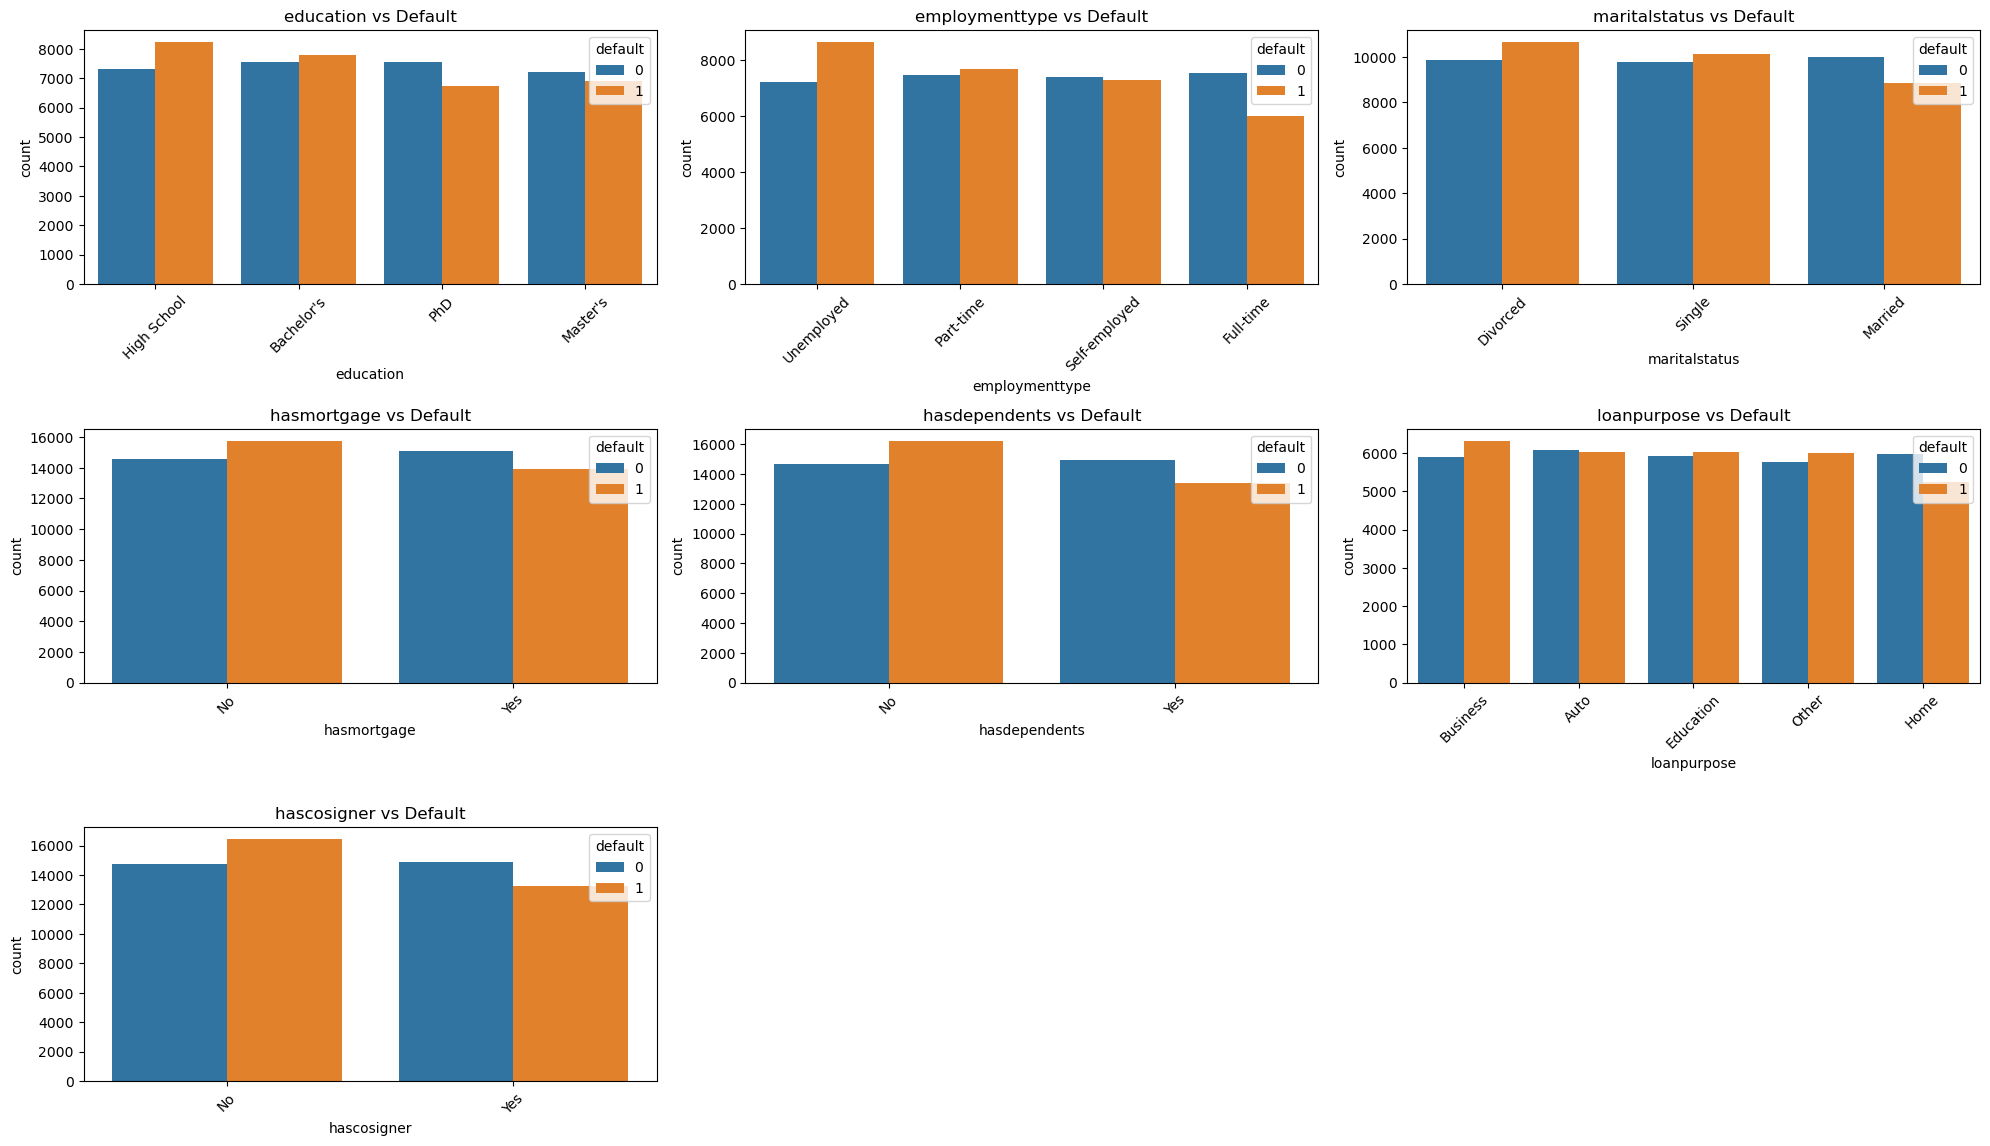

In [55]:
categorical_columns = ['education', 'employmenttype', 'maritalstatus', 'hasmortgage',
                       'hasdependents', 'loanpurpose', 'hascosigner']

# Categorical features vs Default
plt.figure(figsize=(20, 15))
for i, c_col in enumerate(categorical_columns):
    plt.subplot(4, 3, i+1)
    sns.countplot(data = balanced_data, x = c_col, hue = 'default', order = balanced_data[c_col].value_counts().index)
    plt.title(f'{c_col} vs Default')
    plt.xticks(rotation = 45)
    plt.tight_layout()
plt.show()

These plots provide strong evidence that the class balancing procedure has been highly effective in achieving a near 50-50 split between defaulting and non-defaulting loans within every single category of every categorical feature.

This means:

1. The models trained on this balanced data will no longer be biased towards the majority class in any specific categorical subgroup.

2. While the individual categories themselves still maintain a somewhat uniform distribution in total counts (as seen in the previous "overall count" plots after balancing), the critical aspect is that the ratio of default to non-default within each category is now normalized.

**Correlation Analysis**

<Figure size 1200x800 with 0 Axes>

<Axes: >

Text(0.5, 1.0, 'Correlation Analysis (Class Balance)')

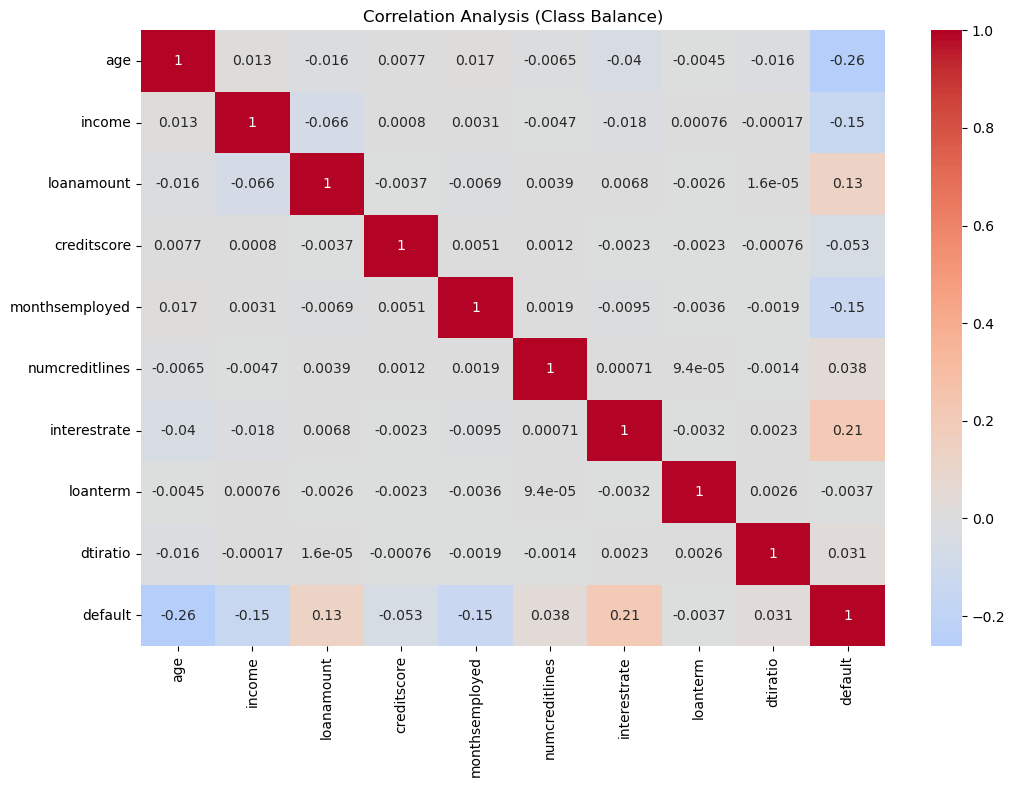

In [58]:
# Plot the Correlation Analysis Map
plt.figure(figsize=(12, 8))
sns.heatmap(balanced_data.corr(numeric_only = True), annot=True, cmap='coolwarm', center=0)
plt.title("Correlation Analysis (Class Balance)")
plt.show()

**Correlations with default**

1. Negative Correlations:
<ul>
    <li>age: -0.26 (Moderate negative correlation)</li>
    <li>income: -0.15 (Weak to moderate negative correlation)</li>
    <li>creditscore: -0.053 (Very weak negative correlation)</li>
    <li>monthsemployed: -0.15 (Weak to moderate negative correlation)</li>
</ul>

2. Positive Correlations:
<ul>
    <li>loanamount: 0.13 (Weak to moderate positive correlation)</li>
    <li>numcreditlines: 0.038 (Very weak positive correlation)</li>
    <li>interestrate: 0.21 (Moderate positive correlation)</li>
    <li>loanterm: 0.0037 (Extremely weak positive correlation - note, this seems to have changed sign but is still negligible)</li>
    <li>dtiratio: 0.031 (Very weak positive correlation)</li>
</ul>
<br>

**Interpretation**

After balancing, the absolute values of most correlation coefficients with default have increased.

<ul>
    <li>age: from -0.17 to -0.26 (stronger negative)</li>
    <li>income: from -0.099 to -0.15 (stronger negative)</li>
    <li>creditscore: from -0.034 to -0.053 (slightly stronger negative)</li>
    <li>monthsemployed: from -0.097 to -0.15 (stronger negative)</li>
    <li>loanamount: from 0.087 to 0.13 (stronger positive)</li>
    <li>interestrate: from 0.13 to 0.21 (stronger positive)</li>
    <li>numcreditlines: from 0.028 to 0.038 (slightly stronger positive)</li>
    <li>dtiratio: from 0.019 to 0.031 (slightly stronger positive)</li>
    <li>loanterm: (negligible in both)</li>
</ul>
<br>
This increase signifies that class balancing has effectively revealed stronger linear relationships between the features and the target variable. By giving equal weight to both defaulting and non-defaulting loans, the correlation calculation is no longer dominated by the majority class, allowing the underlying patterns related to default to become more apparent.

### Data Preprocessing

In [61]:
df = balanced_data.copy()
print("Shape of Data: {}".format(df.shape))

# Define Features
target = 'default'
cat_cols = ['education', 'employmenttype', 'maritalstatus', 'hasmortgage',
            'hasdependents', 'loanpurpose', 'hascosigner']


num_cols = ['age','income', 'loanamount', 'creditscore', 'monthsemployed',
            'numcreditlines', 'interestrate', 'loanterm', 'dtiratio']

X = df[cat_cols + num_cols]
y = df[target]

Shape of Data: (59306, 17)


In [62]:
# Split the data into Train and Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print("Training Data Points (80%): {}".format(X_train.shape[0]))
print(" ")
print("Testing Data Points (20%): {}".format(X_test.shape[0]))

Training Data Points (80%): 47444
 
Testing Data Points (20%): 11862


In [63]:
# Transform the numerical and categorical columns (Logistic Regression and MLP)
preprocessor = make_column_transformer(
                                        (StandardScaler(), num_cols),
                                        (OneHotEncoder(drop='first', handle_unknown='ignore'), cat_cols)
                                      )
# Transform the categorical columns (Decision Tree, Random Forest, Gradient Boosting)
preprocessor_1 = make_column_transformer((OneHotEncoder(drop='first', handle_unknown='ignore'), cat_cols),
                                        remainder='passthrough')  # Keep numerical features as-i)

### Model Developments (Training and Evaluating Model)

<ol>
    <li>Logistic Regression</li>
    <li>Decision Tree Classifier</li>
    <li>Random Forest Classifier</li>
    <li>Gradient Boosting (XGBoost, LightGBM, CatBoost)</li>
    <li>Support Vector Machines (SVM)</li>
    <li>FeedForward Neural Network (MLP)</li>
</ol>

### 1. Logistic Regression

#### **Baseline Model**

In [68]:
# Creating the Pipeline
logreg_base_pipe = make_pipeline(preprocessor,LogisticRegression(max_iter=1000))

# Train the Base Model
logreg_base_pipe.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('standardscaler',
                                                  StandardScaler(),
                                                  ['age', 'income',
                                                   'loanamount', 'creditscore',
                                                   'monthsemployed',
                                                   'numcreditlines',
                                                   'interestrate', 'loanterm',
                                                   'dtiratio']),
                                                 ('onehotencoder',
                                                  OneHotEncoder(drop='first',
                                                                handle_unknown='ignore'),
                                                  ['education',
                                                   'employmenttype',
                                                   'maritalstatus',
                                                   'hasmortgage',
                                                   'hasdependents',
                                                   'loanpurpose',
                                                   'hascosigner'])])),
                ('logisticregression', LogisticRegression(max_iter=1000))])

In [69]:
# Predictions and Probabilities

# ---Training Set-----
y_train_actual = y_train
y_train_pred = logreg_base_pipe.predict(X_train)

# Classification Report of Training Data
print("Classification Report of Training Data:")
print(classification_report(y_train_actual, y_train_pred))

Classification Report of Training Data:
              precision    recall  f1-score   support

           0       0.68      0.67      0.68     23722
           1       0.68      0.69      0.68     23722

    accuracy                           0.68     47444
   macro avg       0.68      0.68      0.68     47444
weighted avg       0.68      0.68      0.68     47444



In [70]:
# ---Test Set-----
y_test_actual = y_test
y_test_pred = logreg_base_pipe.predict(X_test)

# Classification Report of Test Data
print("Classification Report of Test Data:")
print(classification_report(y_test_actual, y_test_pred))

Classification Report of Test Data:
              precision    recall  f1-score   support

           0       0.68      0.67      0.68      5931
           1       0.68      0.69      0.68      5931

    accuracy                           0.68     11862
   macro avg       0.68      0.68      0.68     11862
weighted avg       0.68      0.68      0.68     11862



##### **Interpretations**

**Accuracy**

An accuracy of 0.68 means that the model correctly predicted the outcome for 68% of the samples in both training and testing datasets. This score indicates that the model is performing similarly on both seen and unseen data. This is a good sign as it suggests the model is not overfitting. However, an accuracy of 68% might be considered moderate.

**Precision**

A precision of 0.68 means that when the model predicted a loan would default, it was correct 68% of the time.

**Recall**

A recall of 0.69 means that the model successfully identified 69% of all actual defaulting loans. This score is important when the cost of False Negatives is high. For example, if failing to identify a defaulting loan leads to significant financial loss, high recall is critical.

The most striking observation is the consistency of the metrics across both the training and testing sets. Accuracy, Precision, and Recall are almost identical (0.68/0.69) for both. This strongly suggests that the model is not overfitting to the training data.

The fact that precision (0.68) and recall (0.69) are very close indicates that the model isn't heavily biased towards either making many positive predictions (leading to high recall but potentially low precision) or being very conservative with positive predictions (leading to high precision but potentially low recall). This is generally a good balance for a base model.

<Axes: >

Text(0.5, 1.0, 'Confusion Matrix of Logistic Regression (Base)')

Text(0.5, 23.52222222222222, 'Predicted')

Text(50.72222222222221, 0.5, 'Actual')

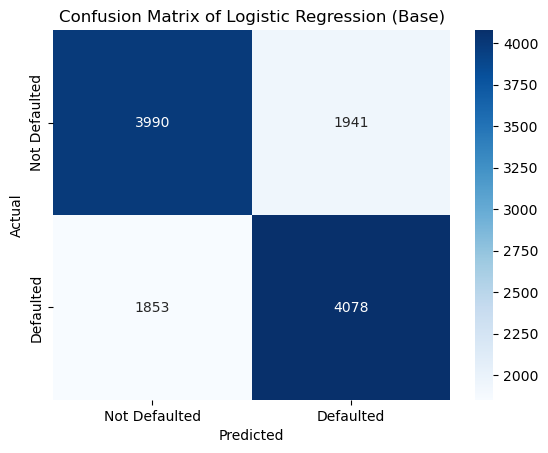

In [72]:
# Confusion Matrix
logreg_base_cm = confusion_matrix(y_test_actual, y_test_pred)
sns.heatmap(logreg_base_cm, annot=True, fmt='d', cmap='Blues',
           xticklabels = ["Not Defaulted", "Defaulted"], yticklabels = ["Not Defaulted", "Defaulted"])
plt.title("Confusion Matrix of Logistic Regression (Base)")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

**True Positive (TP): 4078**

These are the cases where the model correctly predicted that a loan would default, and the loan actually did default.

**False Negative (FN): 1853**

These are the cases where the model incorrectly predicted that a loan would not default, but the loan actually did default. This is a **Type II error**. In the context of loan prediction, these are "missed defaults" – loans that will default but the model failed to flag them. This can be a costly error for a lender.

**False Positive (FP): 1941**

These are the cases where the model incorrectly predicted that a loan would default, but the loan actually did not default. This is a **Type I error**. In loan prediction, these are "false alarms" – healthy loans that the model wrongly flagged as risky. This could lead to denying a loan to a good customer.

**True Negative (TN): 3990**

These are the cases where the model correctly predicted that a loan would not default, and the loan actually did not default.

While the balance is good, the absolute numbers of errors (1853 FN and 1941 FP) indicate that there's significant room for improvement. Almost 1900 defaulting loans were missed, and almost 2000 healthy loans were wrongly flagged as risky.

ROC-AUC Score: 0.7483


Text(0.5, 0, 'False Positive Rate')

Text(0, 0.5, 'True Positive Rate')

Text(0.5, 1.0, 'ROC Curve of Logistic Regression (Base)')

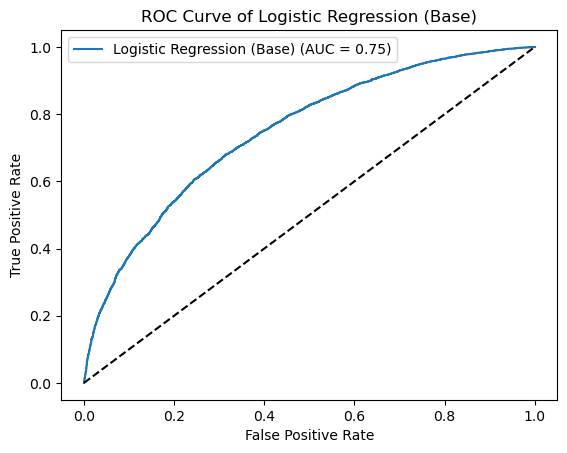

In [74]:
# ROC-AUC Score
y_test_prob = logreg_base_pipe.predict_proba(X_test)[:, 1]
logreg_base_roc_auc = roc_auc_score(y_test_actual, y_test_prob)
print(f"ROC-AUC Score: {logreg_base_roc_auc:.4f}")

# 12. ROC Curve
logreg_base_fpr, logreg_base_tpr, thresholds = roc_curve(y_test_actual, y_test_prob)
plt.plot(logreg_base_fpr, logreg_base_tpr, label=f"Logistic Regression (Base) (AUC = {logreg_base_roc_auc:.2f})")
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve of Logistic Regression (Base)")
plt.legend()
plt.show()

1. AUC of 0.75 means the model has good discriminative power. There's a 75% chance that the model ranks a randomly chosen defaulted borrower higher than a non-defaulted one.

2. The blue curve stays consistently above the dashed diagonal line, which means the model performs better than random guessing. The further the curve is from the diagonal (toward the top-left corner), the better the model.

#### **Hyperparameter Tuning**

In [77]:
# Creating the Pipeline
logreg_p1_pipe = make_pipeline(preprocessor,LogisticRegression(max_iter=1000))

# Parameter 1
logreg_p1_param = {
    "logisticregression__C" : [0.00001, 0.0001, 0.001, 0.01, 1, 10, 100],
    "logisticregression__penalty" : ["l1", "l2"],
    "logisticregression__solver" : ['lbfgs', "liblinear", "saga"]
}

# Cross Validation
logreg_p1_grid = GridSearchCV(logreg_p1_pipe, param_grid = logreg_p1_param, cv = 5, n_jobs = -1, scoring = "accuracy")

# Train the Model
logreg_p1_grid.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('columntransformer',
                                        ColumnTransformer(transformers=[('standardscaler',
                                                                         StandardScaler(),
                                                                         ['age',
                                                                          'income',
                                                                          'loanamount',
                                                                          'creditscore',
                                                                          'monthsemployed',
                                                                          'numcreditlines',
                                                                          'interestrate',
                                                                          'loanterm',
                                                                          'dtiratio']),
                                                                        ('onehotencoder',
                                                                         OneHotEncoder(drop='first',
                                                                                       handle_unknown='ignore'),
                                                                         ['education',
                                                                          'employmenttype',
                                                                          'maritalstatus',
                                                                          'hasmortgage',
                                                                          'hasdependents',
                                                                          'loanpurpose',
                                                                          'hascosigner'])])),
                                       ('logisticregression',
                                        LogisticRegression(max_iter=1000))]),
             n_jobs=-1,
             param_grid={'logisticregression__C': [1e-05, 0.0001, 0.001, 0.01,
                                                   1, 10, 100],
                         'logisticregression__penalty': ['l1', 'l2'],
                         'logisticregression__solver': ['lbfgs', 'liblinear',
                                                        'saga']},
             scoring='accuracy')

In [78]:
# Best Parameter
logreg_p1_best_param = logreg_p1_grid.best_params_
print("Best Parameter: {}".format(logreg_p1_best_param))

# Best Model
logreg_p1_best_model = logreg_p1_grid.best_estimator_

Best Parameter: {'logisticregression__C': 1, 'logisticregression__penalty': 'l2', 'logisticregression__solver': 'liblinear'}


In [79]:
# Predictions

# ---Training Set-----
y_train_actual = y_train
y_train_pred = logreg_p1_best_model.predict(X_train)

# Classification Report of Training Data
print("Classification Report of Training Data:")
print(classification_report(y_train_actual, y_train_pred))

Classification Report of Training Data:
              precision    recall  f1-score   support

           0       0.68      0.67      0.68     23722
           1       0.68      0.69      0.68     23722

    accuracy                           0.68     47444
   macro avg       0.68      0.68      0.68     47444
weighted avg       0.68      0.68      0.68     47444



In [80]:
# ---Test Set-----
y_test_actual = y_test
y_test_pred = logreg_p1_best_model.predict(X_test)

# Classification Report of Test Data
print("Classification Report of Test Data:")
print(classification_report(y_test_actual, y_test_pred))

Classification Report of Test Data:
              precision    recall  f1-score   support

           0       0.68      0.67      0.68      5931
           1       0.68      0.69      0.68      5931

    accuracy                           0.68     11862
   macro avg       0.68      0.68      0.68     11862
weighted avg       0.68      0.68      0.68     11862



<Axes: >

Text(0.5, 1.0, 'Confusion Matrix of Logistic Regression (Parameter 1)')

Text(0.5, 23.52222222222222, 'Predicted')

Text(50.72222222222221, 0.5, 'Actual')

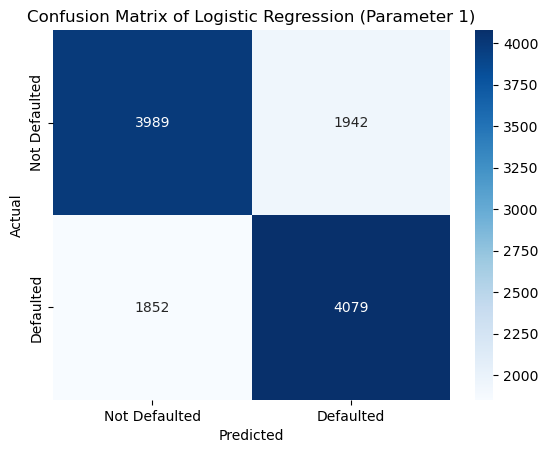

In [81]:
# Confusion Matrix
logreg_p1_cm = confusion_matrix(y_test_actual, y_test_pred)
sns.heatmap(logreg_p1_cm, annot=True, fmt='d', cmap='Blues',
           xticklabels = ["Not Defaulted", "Defaulted"], yticklabels = ["Not Defaulted", "Defaulted"])
plt.title("Confusion Matrix of Logistic Regression (Parameter 1)")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

ROC-AUC Score: 0.7483


Text(0.5, 0, 'False Positive Rate')

Text(0, 0.5, 'True Positive Rate')

Text(0.5, 1.0, 'ROC Curve of Logistic Regression (Parameter 1)')

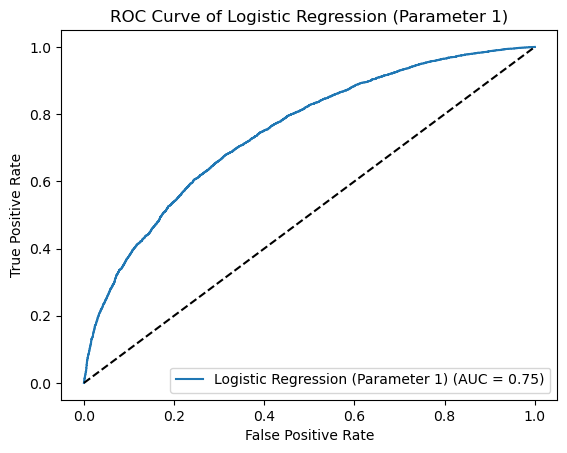

In [82]:
# ROC-AUC Score
y_test_prob = logreg_p1_best_model.predict_proba(X_test)[:, 1]

logreg_p1_roc_auc = roc_auc_score(y_test_actual, y_test_prob)
print(f"ROC-AUC Score: {logreg_p1_roc_auc:.4f}")

# Plot ROC Curve
logreg_p1_fpr, logreg_p1_tpr, thresholds = roc_curve(y_test_actual, y_test_prob)
plt.plot(logreg_p1_fpr, logreg_p1_tpr, label=f"Logistic Regression (Parameter 1) (AUC = {logreg_p1_roc_auc:.2f})")
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve of Logistic Regression (Parameter 1)")
plt.legend()
plt.show()

Even after hyperparameter tuning, the results are quite similar to baseline model. This means as Logistic Regression is a linear model, it finds a straight line (or hyperplane in higher dimensions) to separate the classes. If the underlying relationship between the features and whether a loan defaults is complex and non-linear, a linear model simply won't be able to capture that complexity, no matter how much you tune its parameters.

Our next step will be to move to next model i.e. **Decision Tree Classifier**

### 2. Decision Tree Classifier

#### **Baseline Model**

In [87]:
# Build Pipeline
dt_pipe = make_pipeline(preprocessor_1,DecisionTreeClassifier(random_state=42))

In [88]:
# Fit the base Model
dt_pipe.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(drop='first',
                                                                handle_unknown='ignore'),
                                                  ['education',
                                                   'employmenttype',
                                                   'maritalstatus',
                                                   'hasmortgage',
                                                   'hasdependents',
                                                   'loanpurpose',
                                                   'hascosigner'])])),
                ('decisiontreeclassifier',
                 DecisionTreeClassifier(random_state=42))])

In [89]:
# Predict

# ---Train Set---
y_train_actual = y_train
y_train_pred = dt_pipe.predict(X_train)
print("Classification Report of Trainig Data:")
print(classification_report(y_train_actual, y_train_pred))

Classification Report of Trainig Data:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     23722
           1       1.00      1.00      1.00     23722

    accuracy                           1.00     47444
   macro avg       1.00      1.00      1.00     47444
weighted avg       1.00      1.00      1.00     47444



In [90]:
# ---Test Set---
y_test_actual = y_test
y_test_pred = dt_pipe.predict(X_test)
print("Classification Report:")
print(classification_report(y_test, y_test_pred))

Classification Report:
              precision    recall  f1-score   support

           0       0.58      0.58      0.58      5931
           1       0.58      0.59      0.59      5931

    accuracy                           0.58     11862
   macro avg       0.58      0.58      0.58     11862
weighted avg       0.58      0.58      0.58     11862



This is a strong indicator that the Decision Tree has learned the training data too well. It has likely memorized the training examples, including their noise and specific patterns, rather than learning generalized rules.

When applied to unseen data (the test set), the model's performance drops dramatically. This indicates that the perfect performance on the training set did not translate to good performance on new, unseen data. The model cannot generalize effectively which leads to an overfitting issue.

<Axes: >

Text(0.5, 1.0, 'Confusion Matrix - Decision Tree (Base)')

Text(0.5, 23.52222222222222, 'Predicted')

Text(50.72222222222221, 0.5, 'Actual')

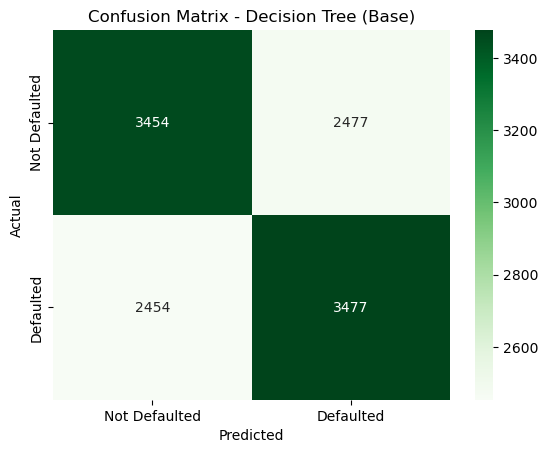

In [92]:
# Confusion Matrix
sns.heatmap(confusion_matrix(y_test_actual, y_test_pred), annot=True, fmt='d', cmap='Greens',
           xticklabels = ["Not Defaulted", "Defaulted"], yticklabels = ["Not Defaulted", "Defaulted"])
plt.title("Confusion Matrix - Decision Tree (Base)")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

The model predicted significant number of False Negatives nearly 2,500 loans that will default are being missed by the model. Similarly, a significant number of False Positives of nearly 2,500 healthy loans are being incorrectly flagged as risky. Compared to the True Positives (3477) and True Negatives (3454), the errors are very high, leading to the low overall accuracy (0.58).

ROC-AUC Score: 0.5843


Text(0.5, 1.0, 'ROC Curve - Decision Tree (Base)')

Text(0.5, 0, 'False Positive Rate')

Text(0, 0.5, 'True Positive Rate')

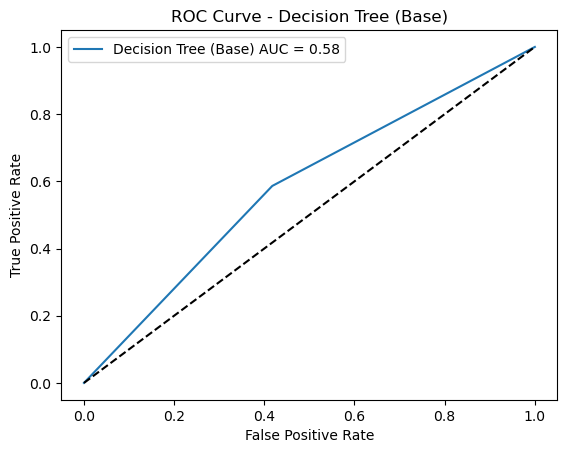

In [94]:
y_test_prob = dt_pipe.predict_proba(X_test)[:, 1]
print(f"ROC-AUC Score: {roc_auc_score(y_test_actual, y_test_prob):.4f}")

# Plot ROC Curve
dt_base_fpr, dt_base_tpr, _ = roc_curve(y_test_actual, y_test_prob)
plt.plot(dt_base_fpr, dt_base_tpr, label=f"Decision Tree (Base) AUC = {roc_auc_score(y_test_actual, y_test_prob):.2f}")
plt.plot([0, 1], [0, 1], 'k--')
plt.title("ROC Curve - Decision Tree (Base)")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.show()

The model has poor discriminative power. An AUC of 0.58 implies the model is only slightly better than random guessing (AUC = 0.5). The curve is not much above the diagonal (dashed line), which represents a random classifier. The ROC curve rises slowly, indicating the model struggles to correctly distinguish between defaults and non-defaults.

#### **Hyperparameter Tuning**

In [97]:
# Parameter 1
dt_p1_param_grid = {
                    'decisiontreeclassifier__max_depth': [3, 5, 7, 10, None],
                    'decisiontreeclassifier__min_samples_split': [2, 5, 10],
                    'decisiontreeclassifier__min_samples_leaf': [1, 3, 5],
                    'decisiontreeclassifier__max_features': ['sqrt', 'log2', None],
                    'decisiontreeclassifier__ccp_alpha': [0.0, 0.01, 0.1],
                    'decisiontreeclassifier__criterion': ['gini', 'entropy']
                    }

# Cross Validation GridSearchCV
dt_p1_grid = GridSearchCV(dt_pipe, param_grid = dt_p1_param_grid, cv = 5, n_jobs = -1, verbose = 1, scoring = "accuracy")

# Fit the Model
dt_p1_grid.fit(X_train, y_train)

Fitting 5 folds for each of 810 candidates, totalling 4050 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('columntransformer',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('onehotencoder',
                                                                         OneHotEncoder(drop='first',
                                                                                       handle_unknown='ignore'),
                                                                         ['education',
                                                                          'employmenttype',
                                                                          'maritalstatus',
                                                                          'hasmortgage',
                                                                          'hasdependents',
                                                                          'loanpurpose',
                                                                          'hascosigner'])])),
                                       ('decisiontreeclassifier',
                                        DecisionTreeClassifier(ra...
             param_grid={'decisiontreeclassifier__ccp_alpha': [0.0, 0.01, 0.1],
                         'decisiontreeclassifier__criterion': ['gini',
                                                               'entropy'],
                         'decisiontreeclassifier__max_depth': [3, 5, 7, 10,
                                                               None],
                         'decisiontreeclassifier__max_features': ['sqrt',
                                                                  'log2',
                                                                  None],
                         'decisiontreeclassifier__min_samples_leaf': [1, 3, 5],
                         'decisiontreeclassifier__min_samples_split': [2, 5,
                                                                       10]},
             scoring='accuracy', verbose=1)

In [98]:
dt_p1_best_param = dt_p1_grid.best_params_
print("Best Parameter: {}".format(dt_p1_best_param))

dt_p1_best_model = dt_p1_grid.best_estimator_

Best Parameter: {'decisiontreeclassifier__ccp_alpha': 0.0, 'decisiontreeclassifier__criterion': 'gini', 'decisiontreeclassifier__max_depth': 7, 'decisiontreeclassifier__max_features': None, 'decisiontreeclassifier__min_samples_leaf': 5, 'decisiontreeclassifier__min_samples_split': 2}


In [99]:
# Predict

# ---Train Set---
y_train_actual = y_train
y_train_pred = dt_p1_best_model.predict(X_train)
print("Classification Report of Trainig Data:")
print(classification_report(y_train_actual, y_train_pred))

Classification Report of Trainig Data:
              precision    recall  f1-score   support

           0       0.67      0.71      0.69     23722
           1       0.69      0.65      0.67     23722

    accuracy                           0.68     47444
   macro avg       0.68      0.68      0.68     47444
weighted avg       0.68      0.68      0.68     47444



In [100]:
# ---Test Set---
y_test_actual = y_test
y_test_pred = dt_p1_best_model.predict(X_test)
print("Classification Report:")
print(classification_report(y_test, y_test_pred))

Classification Report:
              precision    recall  f1-score   support

           0       0.65      0.69      0.67      5931
           1       0.67      0.63      0.65      5931

    accuracy                           0.66     11862
   macro avg       0.66      0.66      0.66     11862
weighted avg       0.66      0.66      0.66     11862



1. **Overfitting Significantly Reduced**: The most crucial observation is the reduction in the gap between training and testing performance. The scores on the training set are no longer perfect, and they are much closer to the test set scores. This indicates that the hyperparameter tuning (pruning) has been highly effective in making the Decision Tree generalize better. The model is no longer simply memorizing the training data.

2. **Generalization Improved**: The model is now generalizing much better to unseen data. The difference between train and test accuracy is only 0.02, and similarly small for precision and recall. This means the model is learning more robust and generalized patterns from the training data.

3. **Overall Performance**: While the overfitting is fixed, this specific Decision Tree configuration is not outperforming the Logistic Regression model in terms of overall metrics.

<Axes: >

Text(0.5, 1.0, 'Confusion Matrix - Decision Tree (Parameter 1)')

Text(0.5, 23.52222222222222, 'Predicted')

Text(50.72222222222221, 0.5, 'Actual')

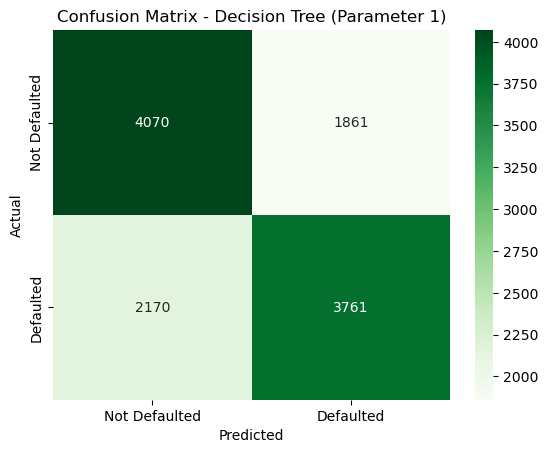

In [102]:
# Confusion Matrix
sns.heatmap(confusion_matrix(y_test_actual, y_test_pred), annot=True, fmt='d', cmap='Greens',
           xticklabels = ["Not Defaulted", "Defaulted"], yticklabels = ["Not Defaulted", "Defaulted"])
plt.title("Confusion Matrix - Decision Tree (Parameter 1)")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

1. The improvements across all four quadrants of the confusion matrix clearly show that the hyperparameter tuning has successfully mitigated the severe overfitting that was present in the Decision Tree base model. The model is now generalizing much better to unseen data.

2. Not only has the total number of errors (FP + FN) decreased from 2477 + 2454 = 4931 to 1861 + 2170 = 4031, but the model is also doing a better job at both correctly identifying defaults (increased TP, decreased FN) and correctly identifying non-defaults (increased TN, decreased FP).

3. The increase in TP and decrease in FN means the model is now better at catching actual defaulting loans.

4. The decrease in FP and increase in TN means the model is also more accurate in identifying truly safe loans, leading to fewer unnecessary denials.

ROC-AUC Score: 0.7159


Text(0.5, 1.0, 'ROC Curve - Decision Tree (Parameter 1)')

Text(0.5, 0, 'False Positive Rate')

Text(0, 0.5, 'True Positive Rate')

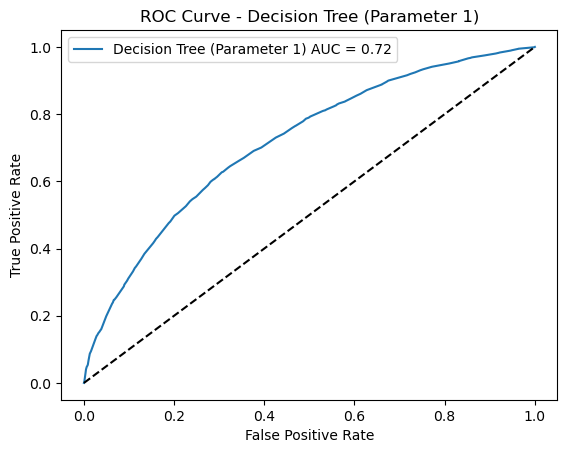

In [104]:
y_test_prob = dt_p1_best_model.predict_proba(X_test)[:, 1]
print(f"ROC-AUC Score: {roc_auc_score(y_test_actual, y_test_prob):.4f}")

# Plot ROC Curve
dt_base_fpr, dt_base_tpr, _ = roc_curve(y_test_actual, y_test_prob)
plt.plot(dt_base_fpr, dt_base_tpr, label=f"Decision Tree (Parameter 1) AUC = {roc_auc_score(y_test_actual, y_test_prob):.2f}")
plt.plot([0, 1], [0, 1], 'k--')
plt.title("ROC Curve - Decision Tree (Parameter 1)")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.show()

After tuning the Decision Tree Classifier, there is a clear improvement in the model's ability to distinguish between defaulters and non-defaulters. The baseline model achieved a low ROC-AUC score of 0.58, indicating that it was only slightly better than random guessing and had poor predictive performance. In contrast, the tuned model, with carefully selected hyperparameters such as max_depth, min_samples_split, min_samples_leaf, max_features, criterion, and ccp_alpha, achieved a much stronger ROC-AUC score of 0.72. This indicates a substantial enhancement in classification ability, with the ROC curve moving further away from the diagonal line and showing higher sensitivity across a range of false positive rates. The tuning process likely reduced overfitting and improved generalization, making the tuned Decision Tree a more reliable model for predicting loan default.

### **Random Forest Classifier**

#### **Baseline Model**

In [108]:
# Build a Pipeline
rf_pipe = make_pipeline(preprocessor_1, RandomForestClassifier(random_state = 42))

In [109]:
# Fit the model
rf_pipe.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(drop='first',
                                                                handle_unknown='ignore'),
                                                  ['education',
                                                   'employmenttype',
                                                   'maritalstatus',
                                                   'hasmortgage',
                                                   'hasdependents',
                                                   'loanpurpose',
                                                   'hascosigner'])])),
                ('randomforestclassifier',
                 RandomForestClassifier(random_state=42))])

In [110]:
# Predictions

# ---Training Set---
y_train_actual = y_train
y_train_pred = rf_pipe.predict(X_train)
print("Classification Report of Training Data: ")
print(classification_report(y_train_actual, y_train_pred))

Classification Report of Training Data: 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     23722
           1       1.00      1.00      1.00     23722

    accuracy                           1.00     47444
   macro avg       1.00      1.00      1.00     47444
weighted avg       1.00      1.00      1.00     47444



In [111]:
# ---Test Set---
y_test_actual = y_test
y_test_pred = rf_pipe.predict(X_test)
print("Classification Report of Test Data: ")
print(classification_report(y_test_actual, y_test_pred))

Classification Report of Test Data: 
              precision    recall  f1-score   support

           0       0.67      0.68      0.68      5931
           1       0.68      0.67      0.68      5931

    accuracy                           0.68     11862
   macro avg       0.68      0.68      0.68     11862
weighted avg       0.68      0.68      0.68     11862



Random Forests are designed to reduce overfitting compared to a single Decision Tree because they build multiple trees and average their predictions. This ensemble approach introduces diversity and typically leads to better generalization. However, if the individual trees within the forest are allowed to grow to full depth (as they are by default in scikit-learn's RandomForestClassifier with max_depth=None), even an ensemble of such trees can collectively overfit the training data.

<Axes: >

Text(0.5, 1.0, 'Confusion Matrix - Random Forest (Base)')

Text(0.5, 23.52222222222222, 'Predicted')

Text(50.72222222222221, 0.5, 'Actual')

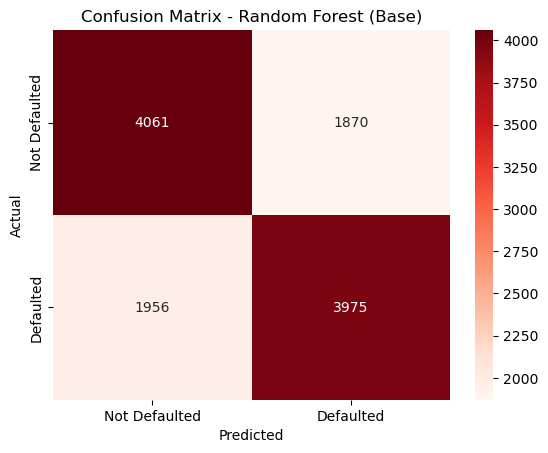

In [113]:
# Confusion Matrix
sns.heatmap(confusion_matrix(y_test_actual, y_test_pred), annot = True, fmt = "d", cmap = "Reds",
            xticklabels = ["Not Defaulted", "Defaulted"], yticklabels = ["Not Defaulted", "Defaulted"])
plt.title("Confusion Matrix - Random Forest (Base)")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

The perfect training scores (1.0 for all metrics) coupled with these test set numbers (0.68 Accuracy, etc.) clearly indicate that the Random Forest Base Model is overfitting. While its test performance is decent, it could be better if it generalizes more effectively.

The Random Forest's 1956 FN is better than the tuned Decision Tree's 2170 FN, meaning it's missing fewer actual defaults. It's close to Logistic Regression's 1853 FN, but slightly higher.

The Random Forest's 1870 FP is better than Logistic Regression's 1941 FP, meaning it's generating fewer false alarms. It's very close to the tuned Decision Tree's 1861 FP.

ROC-AUC Score: 0.7410


Text(0.5, 1.0, 'ROC Curve - Random Forest (Base)')

Text(0.5, 0, 'False Positive Rate')

Text(0, 0.5, 'True Positive Rate')

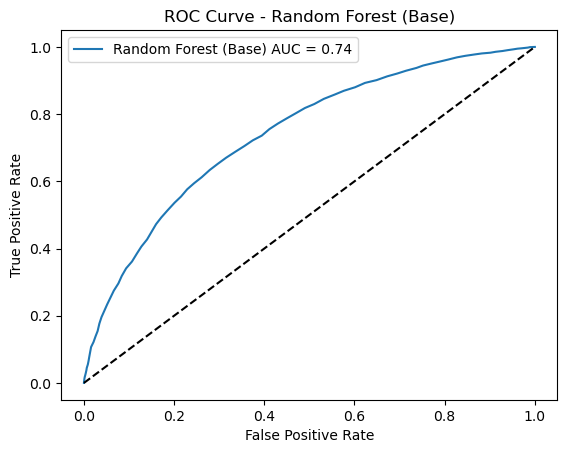

In [115]:
y_test_prob = rf_pipe.predict_proba(X_test)[:,1]
print(f"ROC-AUC Score: {roc_auc_score(y_test_actual, y_test_prob):.4f}")

# Plot ROC Curve
rf_base_fpr, rf_base_tpr, _ = roc_curve(y_test_actual, y_test_prob)
plt.plot(rf_base_fpr, rf_base_tpr, label=f"Random Forest (Base) AUC = {roc_auc_score(y_test_actual, y_test_prob):.2f}")
plt.plot([0, 1], [0, 1], 'k--')
plt.title("ROC Curve - Random Forest (Base)")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.show()

The model has a 74% chance of ranking a randomly selected defaulter higher than a non-defaulter. This is significantly better than random guessing (AUC = 0.50) and shows strong class separation. 

The curve lies well above the diagonal baseline (dashed line), particularly in the early range (low FPR), meaning the model can identify true positives with relatively low false positives and there’s solid sensitivity/recall for many thresholds.

#### **Hyperparameter Tuning**

In [118]:
# Parameter 1
rf_p1_params = {
                'randomforestclassifier__n_estimators': [100, 200],
                'randomforestclassifier__max_depth': [None, 5, 10],
                'randomforestclassifier__min_samples_split': [2, 5],
                'randomforestclassifier__min_samples_leaf': [1, 2],
                'randomforestclassifier__max_features': ['sqrt', 'log2']
            }

# Cross Validation using GridSearchCV
rf_p1_grid = GridSearchCV(rf_pipe, param_grid = rf_p1_params, cv = 5, n_jobs = -1, scoring = "accuracy", verbose = 1)

# Fit the Model
rf_p1_grid.fit(X_train, y_train)

Fitting 5 folds for each of 48 candidates, totalling 240 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('columntransformer',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('onehotencoder',
                                                                         OneHotEncoder(drop='first',
                                                                                       handle_unknown='ignore'),
                                                                         ['education',
                                                                          'employmenttype',
                                                                          'maritalstatus',
                                                                          'hasmortgage',
                                                                          'hasdependents',
                                                                          'loanpurpose',
                                                                          'hascosigner'])])),
                                       ('randomforestclassifier',
                                        RandomForestClassifier(random_state=42))]),
             n_jobs=-1,
             param_grid={'randomforestclassifier__max_depth': [None, 5, 10],
                         'randomforestclassifier__max_features': ['sqrt',
                                                                  'log2'],
                         'randomforestclassifier__min_samples_leaf': [1, 2],
                         'randomforestclassifier__min_samples_split': [2, 5],
                         'randomforestclassifier__n_estimators': [100, 200]},
             scoring='accuracy', verbose=1)

In [119]:
# Best Parameter
rf_p1_best_param = rf_p1_grid.best_params_
print("Best Parameter: {}".format(rf_p1_best_param))

# Best Model
rf_p1_best_model = rf_p1_grid.best_estimator_

Best Parameter: {'randomforestclassifier__max_depth': 10, 'randomforestclassifier__max_features': 'sqrt', 'randomforestclassifier__min_samples_leaf': 1, 'randomforestclassifier__min_samples_split': 2, 'randomforestclassifier__n_estimators': 200}


In [120]:
# Predictions

# ---Training Data---
y_train_actual = y_train
y_train_pred = rf_p1_best_model.predict(X_train)
print("Classification Report of Training Data: ")
print(classification_report(y_train_actual, y_train_pred))

Classification Report of Training Data: 
              precision    recall  f1-score   support

           0       0.75      0.76      0.75     23722
           1       0.75      0.75      0.75     23722

    accuracy                           0.75     47444
   macro avg       0.75      0.75      0.75     47444
weighted avg       0.75      0.75      0.75     47444



In [121]:
# ---Test Data---
y_test_actual = y_test
y_test_pred = rf_p1_best_model.predict(X_test)
print("Classification Report of Test Data: ")
print(classification_report(y_test_actual, y_test_pred))

Classification Report of Test Data: 
              precision    recall  f1-score   support

           0       0.68      0.68      0.68      5931
           1       0.68      0.68      0.68      5931

    accuracy                           0.68     11862
   macro avg       0.68      0.68      0.68     11862
weighted avg       0.68      0.68      0.68     11862



Tuning the model has successfully regularized the individual trees within the forest. They are no longer allowed to grow infinitely deep and memorize the training data which has controlled the complexity. While tuning the parameter successfully addressed the overfitting problem, it did not lead to a significant increase in absolute performance on unseen data. It also helps in reducing the gap between training and test results.

<Axes: >

Text(0.5, 1.0, 'Confusion Matrix - Random Forest (Parameter 1)')

Text(0.5, 23.52222222222222, 'Predicted')

Text(50.72222222222221, 0.5, 'Actual')

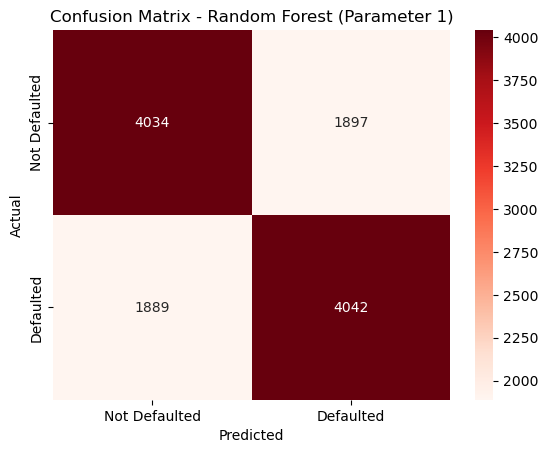

In [122]:
# Confusion Matrix
sns.heatmap(confusion_matrix(y_test_actual, y_test_pred), annot = True, fmt = "d", cmap = "Reds",
            xticklabels = ["Not Defaulted", "Defaulted"], yticklabels = ["Not Defaulted", "Defaulted"])
plt.title("Confusion Matrix - Random Forest (Parameter 1)")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

The tuning process successfully addressed the overfitting of the base Random Forest. The model is now much more robust.

A slight increase in True Positives (+67) and a decrease in False Negatives (-67) means the tuned model is slightly better at correctly identifying actual defaults.

ROC-AUC Score: 0.7476


Text(0.5, 1.0, 'ROC Curve - Random Forest (Parameter 1)')

Text(0.5, 0, 'False Positive Rate')

Text(0, 0.5, 'True Positive Rate')

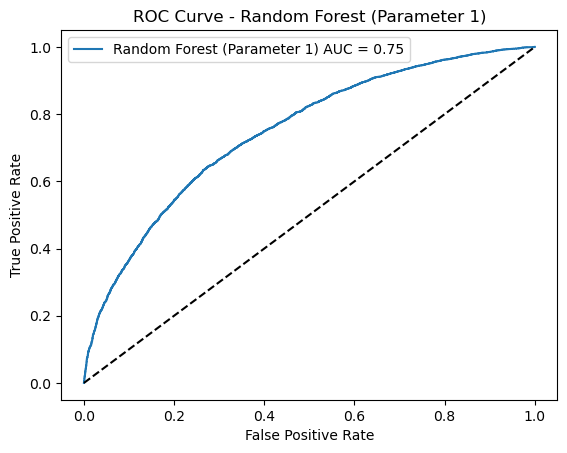

In [123]:
y_test_prob = rf_p1_best_model.predict_proba(X_test)[:,1]
print(f"ROC-AUC Score: {roc_auc_score(y_test_actual, y_test_prob):.4f}")

# Plot ROC Curve
rf_p1_fpr, rf_p1_tpr, _ = roc_curve(y_test_actual, y_test_prob)
plt.plot(rf_p1_fpr, rf_p1_tpr, label=f"Random Forest (Parameter 1) AUC = {roc_auc_score(y_test_actual, y_test_prob):.2f}")
plt.plot([0, 1], [0, 1], 'k--')
plt.title("ROC Curve - Random Forest (Parameter 1)")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.show()

The base Random Forest was already strong (AUC = 0.74). Hyperparameter tuning improved AUC slightly to 0.75, showing some benefit but not a dramatic gain.

### **4a. Gradient Boosting**

#### **Baseline Model**

In [204]:
# Build a Pipeline
gb_pipe = make_pipeline(preprocessor_1, GradientBoostingClassifier(random_state = 42))

# Fit the Model
gb_pipe.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(drop='first',
                                                                handle_unknown='ignore'),
                                                  ['education',
                                                   'employmenttype',
                                                   'maritalstatus',
                                                   'hasmortgage',
                                                   'hasdependents',
                                                   'loanpurpose',
                                                   'hascosigner'])])),
                ('gradientboostingclassifier',
                 GradientBoostingClassifier(random_state=42))])

In [206]:
# Predictions

# ---Training Data---
y_train_actual = y_train
y_train_pred = gb_pipe.predict(X_train)
print("Classification Report of Training Data: ")
print(classification_report(y_train_actual, y_train_pred))

Classification Report of Training Data: 
              precision    recall  f1-score   support

           0       0.69      0.70      0.69     23722
           1       0.69      0.69      0.69     23722

    accuracy                           0.69     47444
   macro avg       0.69      0.69      0.69     47444
weighted avg       0.69      0.69      0.69     47444



In [208]:
# ---Test Data---
y_test_actual = y_test
y_test_pred = gb_pipe.predict(X_test)
print("Classification Report of Test Data: ")
print(classification_report(y_test_actual, y_test_pred))

Classification Report of Test Data: 
              precision    recall  f1-score   support

           0       0.69      0.68      0.68      5931
           1       0.68      0.69      0.68      5931

    accuracy                           0.68     11862
   macro avg       0.68      0.68      0.68     11862
weighted avg       0.68      0.68      0.68     11862



The model achieves very similar performance on the training data across all three metrics. Importantly, these scores are not 1.0 (perfect), which is a good sign as it indicates the base model is not severely overfitting right out of the box. The model's performance on unseen data is almost identical to its training performance.

<Axes: >

Text(0.5, 1.0, 'Confusion Matrix - Gradient Boosting (Base)')

Text(0.5, 23.52222222222222, 'Predicted')

Text(50.72222222222221, 0.5, 'Actual')

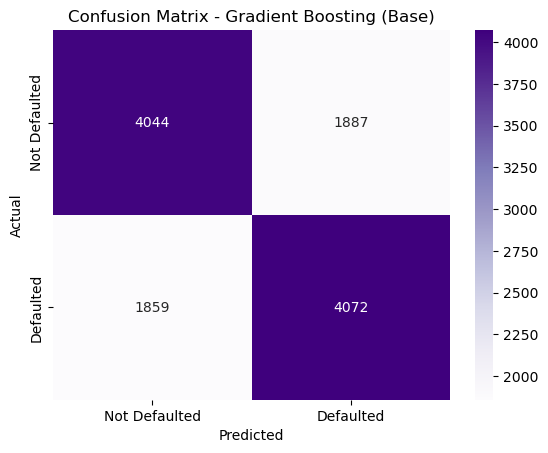

In [214]:
# Confusion Matrix
sns.heatmap(confusion_matrix(y_test_actual, y_test_pred), annot = True, fmt = "d", cmap = "Purples",
            xticklabels = ["Not Defaulted", "Defaulted"], yticklabels = ["Not Defaulted", "Defaulted"])
plt.title("Confusion Matrix - Gradient Boosting (Base)")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

ROC-AUC Score: 0.7513


Text(0.5, 1.0, 'ROC Curve - Gradient Boosting (Base)')

Text(0.5, 0, 'False Positive Rate')

Text(0, 0.5, 'True Positive Rate')

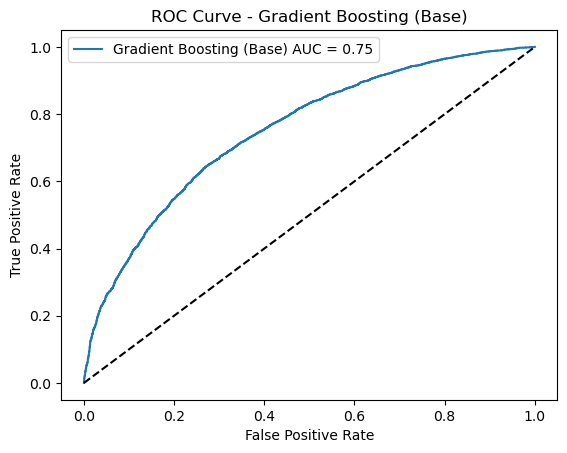

In [212]:
y_test_prob = gb_pipe.predict_proba(X_test)[:,1]
print(f"ROC-AUC Score: {roc_auc_score(y_test_actual, y_test_prob):.4f}")

# Plot ROC Curve
gb_base_fpr, gb_base_tpr, _ = roc_curve(y_test_actual, y_test_prob)
plt.plot(gb_base_fpr, gb_base_tpr, label=f"Gradient Boosting (Base) AUC = {roc_auc_score(y_test_actual, y_test_prob):.2f}")
plt.plot([0, 1], [0, 1], 'k--')
plt.title("ROC Curve - Gradient Boosting (Base)")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.show()

#### **Hyperparameter Tuning**

In [217]:
# Parameter 1
gb_p1_param_grid = {
                    'gradientboostingclassifier__n_estimators': [100, 200],
                    'gradientboostingclassifier__learning_rate': [0.05, 0.1],
                    'gradientboostingclassifier__max_depth': [3, 5],
                    'gradientboostingclassifier__min_samples_split': [2, 5],
                    'gradientboostingclassifier__min_samples_leaf': [1, 3],
                    'gradientboostingclassifier__subsample': [0.8, 1.0],
                    'gradientboostingclassifier__max_features': ['sqrt', 'log2']
                    }

# Cross Validation GridSearchCV
gb_p1_grid = GridSearchCV(gb_pipe, param_grid = gb_p1_param_grid, cv = 5, scoring = "accuracy", n_jobs = -1, verbose = 1)

# Fit the model
gb_p1_grid.fit(X_train, y_train)

Fitting 5 folds for each of 128 candidates, totalling 640 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('columntransformer',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('onehotencoder',
                                                                         OneHotEncoder(drop='first',
                                                                                       handle_unknown='ignore'),
                                                                         ['education',
                                                                          'employmenttype',
                                                                          'maritalstatus',
                                                                          'hasmortgage',
                                                                          'hasdependents',
                                                                          'loanpurpose',
                                                                          'hascosigner'])])),
                                       ('gradientboostingclassifier',
                                        GradientBoostingClass...
                                                                       0.1],
                         'gradientboostingclassifier__max_depth': [3, 5],
                         'gradientboostingclassifier__max_features': ['sqrt',
                                                                      'log2'],
                         'gradientboostingclassifier__min_samples_leaf': [1, 3],
                         'gradientboostingclassifier__min_samples_split': [2,
                                                                           5],
                         'gradientboostingclassifier__n_estimators': [100, 200],
                         'gradientboostingclassifier__subsample': [0.8, 1.0]},
             scoring='accuracy', verbose=1)

In [219]:
# Best parameter
print("Best Parameter: {}".format(gb_p1_grid.best_params_))

# Best Model
gb_p1_best_model = gb_p1_grid.best_estimator_

Best Parameter: {'gradientboostingclassifier__learning_rate': 0.05, 'gradientboostingclassifier__max_depth': 5, 'gradientboostingclassifier__max_features': 'sqrt', 'gradientboostingclassifier__min_samples_leaf': 1, 'gradientboostingclassifier__min_samples_split': 5, 'gradientboostingclassifier__n_estimators': 200, 'gradientboostingclassifier__subsample': 0.8}


In [221]:
# Predictions

# ---Training Data---
y_train_actual = y_train
y_train_pred = gb_p1_best_model.predict(X_train)
print("Classification Report of Training Data: ")
print(classification_report(y_train_actual, y_train_pred))

Classification Report of Training Data: 
              precision    recall  f1-score   support

           0       0.71      0.71      0.71     23722
           1       0.71      0.71      0.71     23722

    accuracy                           0.71     47444
   macro avg       0.71      0.71      0.71     47444
weighted avg       0.71      0.71      0.71     47444



In [223]:
# ---Test Data---
y_test_actual = y_test
y_test_pred = gb_p1_best_model.predict(X_test)
print("Classification Report of Test Data: ")
print(classification_report(y_test_actual, y_test_pred))

Classification Report of Test Data: 
              precision    recall  f1-score   support

           0       0.69      0.68      0.69      5931
           1       0.69      0.69      0.69      5931

    accuracy                           0.69     11862
   macro avg       0.69      0.69      0.69     11862
weighted avg       0.69      0.69      0.69     11862



<Axes: >

Text(0.5, 1.0, 'Confusion Matrix - Gradient Boosting (Parameter 1)')

Text(0.5, 23.52222222222222, 'Predicted')

Text(50.72222222222221, 0.5, 'Actual')

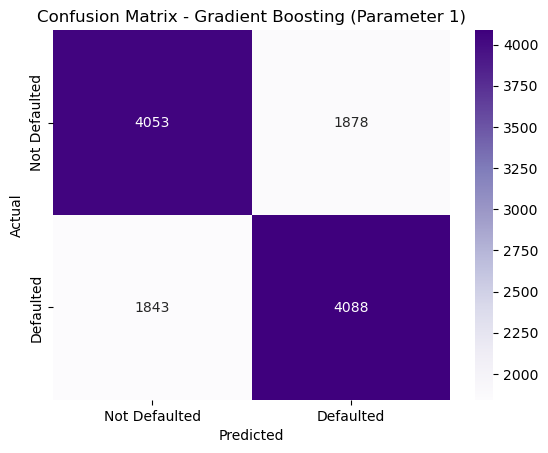

In [225]:
# Confusion Matrix
sns.heatmap(confusion_matrix(y_test_actual, y_test_pred), annot = True, fmt = "d", cmap = "Purples",
            xticklabels = ["Not Defaulted", "Defaulted"], yticklabels = ["Not Defaulted", "Defaulted"])
plt.title("Confusion Matrix - Gradient Boosting (Parameter 1)")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

ROC-AUC Score: 0.7518


Text(0.5, 1.0, 'ROC Curve - Gradient Boosting (Parameter 1)')

Text(0.5, 0, 'False Positive Rate')

Text(0, 0.5, 'True Positive Rate')

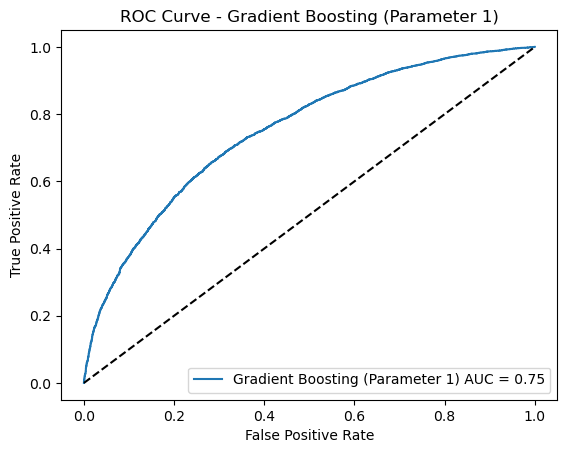

In [227]:
y_test_prob = gb_p1_best_model.predict_proba(X_test)[:,1]
print(f"ROC-AUC Score: {roc_auc_score(y_test_actual, y_test_prob):.4f}")

# Plot ROC Curve
gb_p1_fpr, gb_p1_tpr, _ = roc_curve(y_test_actual, y_test_prob)
plt.plot(gb_p1_fpr, gb_p1_tpr, label=f"Gradient Boosting (Parameter 1) AUC = {roc_auc_score(y_test_actual, y_test_prob):.2f}")
plt.plot([0, 1], [0, 1], 'k--')
plt.title("ROC Curve - Gradient Boosting (Parameter 1)")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.show()

### **XGBoost**

#### **Baseline Model**

In [234]:
# Build a Pipeline
xgb_pipe = make_pipeline(preprocessor_1, XGBClassifier(objective='binary:logistic', eval_metric='logloss',
                                                       use_label_encoder=False,random_state=42))

# Fit the Model
xgb_pipe.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(drop='first',
                                                                handle_unknown='ignore'),
                                                  ['education',
                                                   'employmenttype',
                                                   'maritalstatus',
                                                   'hasmortgage',
                                                   'hasdependents',
                                                   'loanpurpose',
                                                   'hascosigner'])])),
                ('xgbclassifier',
                 XGBClassifier(base_score=None, booster=None, callbacks=None,
                               cols...
                               feature_types=None, feature_weights=None,
                               gamma=None, grow_policy=None,
                               importance_type=None,
                               interaction_constraints=None, learning_rate=None,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=None, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, multi_strategy=None,
                               n_estimators=None, n_jobs=None,
                               num_parallel_tree=None, ...))])

In [236]:
# Predictions

# ---Training Data---
y_train_actual = y_train
y_train_pred = xgb_pipe.predict(X_train)
print("Classification Report of Training Data: ")
print(classification_report(y_train_actual, y_train_pred))

Classification Report of Training Data: 
              precision    recall  f1-score   support

           0       0.79      0.79      0.79     23722
           1       0.79      0.79      0.79     23722

    accuracy                           0.79     47444
   macro avg       0.79      0.79      0.79     47444
weighted avg       0.79      0.79      0.79     47444



In [238]:
# ---Test Data---
y_test_actual = y_test
y_test_pred = xgb_pipe.predict(X_test)
print("Classification Report of Test Data: ")
print(classification_report(y_test_actual, y_test_pred))

Classification Report of Test Data: 
              precision    recall  f1-score   support

           0       0.67      0.68      0.67      5931
           1       0.67      0.67      0.67      5931

    accuracy                           0.67     11862
   macro avg       0.67      0.67      0.67     11862
weighted avg       0.67      0.67      0.67     11862



<Axes: >

Text(0.5, 1.0, 'Confusion Matrix - XGBoost (Base)')

Text(0.5, 23.52222222222222, 'Predicted')

Text(50.72222222222221, 0.5, 'Actual')

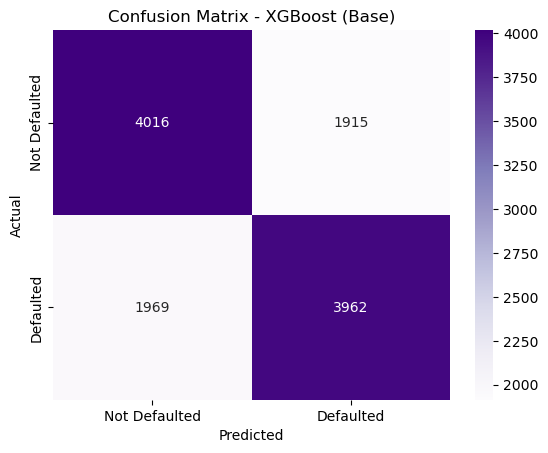

In [254]:
# Confusion Matrix
sns.heatmap(confusion_matrix(y_test_actual, y_test_pred), annot = True, fmt = "d", cmap = "Purples",
            xticklabels = ["Not Defaulted", "Defaulted"], yticklabels = ["Not Defaulted", "Defaulted"])
plt.title("Confusion Matrix - XGBoost (Base)")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

ROC-AUC Score: 0.7320


Text(0.5, 1.0, 'ROC Curve - XGBoost (Base)')

Text(0.5, 0, 'False Positive Rate')

Text(0, 0.5, 'True Positive Rate')

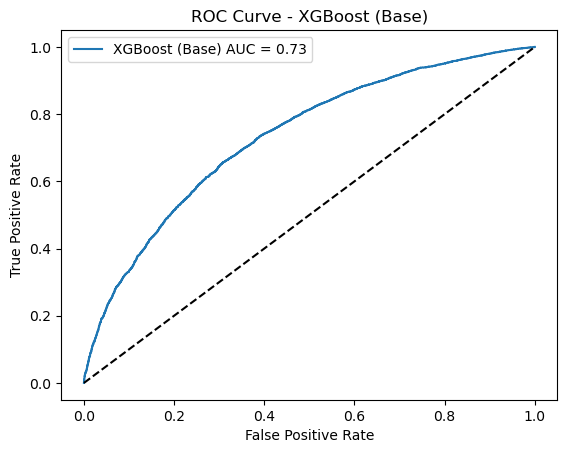

In [256]:
y_test_prob = xgb_pipe.predict_proba(X_test)[:,1]
print(f"ROC-AUC Score: {roc_auc_score(y_test_actual, y_test_prob):.4f}")

# Plot ROC Curve
xgb_base_fpr, xgb_base_tpr, _ = roc_curve(y_test_actual, y_test_prob)
plt.plot(xgb_base_fpr, xgb_base_tpr, label=f"XGBoost (Base) AUC = {roc_auc_score(y_test_actual, y_test_prob):.2f}")
plt.plot([0, 1], [0, 1], 'k--')
plt.title("ROC Curve - XGBoost (Base)")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.show()

#### **Hyperparameter Tuning**

In [261]:
import warnings
warnings.simplefilter("ignore")

# Parameter 1
xgb_p1_param= {
    'xgbclassifier__n_estimators': [100, 200],
    'xgbclassifier__learning_rate': [0.05, 0.1],
    'xgbclassifier__max_depth': [3, 5],
    'xgbclassifier__min_child_weight': [1, 3],
    'xgbclassifier__subsample': [0.8, 1.0],
    'xgbclassifier__colsample_bytree': [0.8, 1.0],
    'xgbclassifier__gamma': [0, 1]
}

# Cross Validation GridSearchCV
xgb_p1_grid = GridSearchCV(xgb_pipe, param_grid = xgb_p1_param, cv = 5, scoring = "accuracy", n_jobs = -1, verbose = 1)

# Fit the model
xgb_p1_grid.fit(X_train, y_train)

Fitting 5 folds for each of 128 candidates, totalling 640 fits


/Applications/anaconda3/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [20:32:13] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Applications/anaconda3/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [20:32:13] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Applications/anaconda3/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [20:32:13] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Applications/anaconda3/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [20:32:13] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not use

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('columntransformer',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('onehotencoder',
                                                                         OneHotEncoder(drop='first',
                                                                                       handle_unknown='ignore'),
                                                                         ['education',
                                                                          'employmenttype',
                                                                          'maritalstatus',
                                                                          'hasmortgage',
                                                                          'hasdependents',
                                                                          'loanpurpose',
                                                                          'hascosigner'])])),
                                       ('xgbclassifier',
                                        XGBClassifier(base_score=None,
                                                      boos...
                                                      n_jobs=None,
                                                      num_parallel_tree=None, ...))]),
             n_jobs=-1,
             param_grid={'xgbclassifier__colsample_bytree': [0.8, 1.0],
                         'xgbclassifier__gamma': [0, 1],
                         'xgbclassifier__learning_rate': [0.05, 0.1],
                         'xgbclassifier__max_depth': [3, 5],
                         'xgbclassifier__min_child_weight': [1, 3],
                         'xgbclassifier__n_estimators': [100, 200],
                         'xgbclassifier__subsample': [0.8, 1.0]},
             scoring='accuracy', verbose=1)

In [263]:
# Best Parameter
print("Best Parameter: {}".format(xgb_p1_grid.best_params_))

# Best Model
xgb_p1_best_model = xgb_p1_grid.best_estimator_

Best Parameter: {'xgbclassifier__colsample_bytree': 1.0, 'xgbclassifier__gamma': 0, 'xgbclassifier__learning_rate': 0.05, 'xgbclassifier__max_depth': 5, 'xgbclassifier__min_child_weight': 3, 'xgbclassifier__n_estimators': 200, 'xgbclassifier__subsample': 0.8}


In [265]:
# Predictions

# ---Training Data---
y_train_actual = y_train
y_train_pred = xgb_p1_best_model.predict(X_train)
print("Classification Report of Training Data: ")
print(classification_report(y_train_actual, y_train_pred))

Classification Report of Training Data: 
              precision    recall  f1-score   support

           0       0.71      0.72      0.71     23722
           1       0.72      0.71      0.71     23722

    accuracy                           0.71     47444
   macro avg       0.71      0.71      0.71     47444
weighted avg       0.71      0.71      0.71     47444



In [267]:
# ---Test Data---
y_test_actual = y_test
y_test_pred = xgb_p1_best_model.predict(X_test)
print("Classification Report of Test Data: ")
print(classification_report(y_test_actual, y_test_pred))

Classification Report of Test Data: 
              precision    recall  f1-score   support

           0       0.68      0.69      0.69      5931
           1       0.69      0.68      0.68      5931

    accuracy                           0.68     11862
   macro avg       0.68      0.68      0.68     11862
weighted avg       0.68      0.68      0.68     11862



<Axes: >

Text(0.5, 1.0, 'Confusion Matrix - XGBoost (Parameter 1)')

Text(0.5, 23.52222222222222, 'Predicted')

Text(50.72222222222221, 0.5, 'Actual')

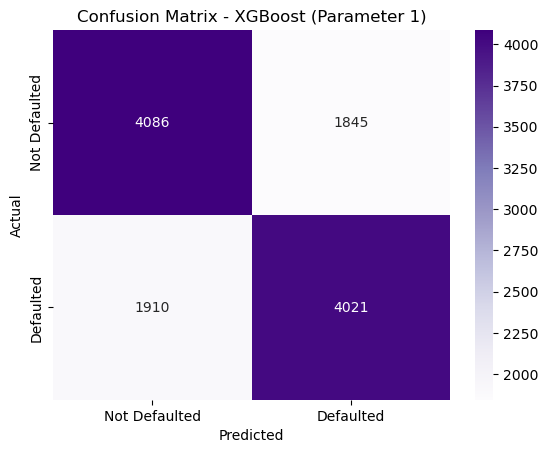

In [269]:
# Confusion Matrix
sns.heatmap(confusion_matrix(y_test_actual, y_test_pred), annot = True, fmt = "d", cmap = "Purples",
            xticklabels = ["Not Defaulted", "Defaulted"], yticklabels = ["Not Defaulted", "Defaulted"])
plt.title("Confusion Matrix - XGBoost (Parameter 1)")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

ROC-AUC Score: 0.7516


Text(0.5, 1.0, 'ROC Curve - XGBoost (Parameter)')

Text(0.5, 0, 'False Positive Rate')

Text(0, 0.5, 'True Positive Rate')

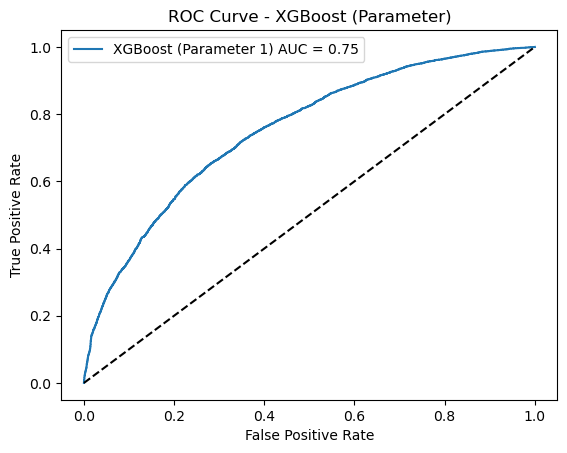

In [271]:
y_test_prob = xgb_p1_best_model.predict_proba(X_test)[:,1]
print(f"ROC-AUC Score: {roc_auc_score(y_test_actual, y_test_prob):.4f}")

# Plot ROC Curve
xgb_p1_fpr, xgb_p1_tpr, _ = roc_curve(y_test_actual, y_test_prob)
plt.plot(xgb_p1_fpr, xgb_p1_tpr, label=f"XGBoost (Parameter 1) AUC = {roc_auc_score(y_test_actual, y_test_prob):.2f}")
plt.plot([0, 1], [0, 1], 'k--')
plt.title("ROC Curve - XGBoost (Parameter)")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.show()